Nous allons dans un premier temps **traiter le jeu de données afin de repérer des variables pertinentes** pour les traitements à venir et **automatiser ces traitements** pour éviter de répéter ces opérations.

## <font color="#00afe6">Sommaire</font>
[1.1. Colonnes et lignes vides / Doublons](#section_1)     
[1.2. Variables redondantes](#section_2)     
[1.3. Les pays de l'analyse](#section_3)     
[1.4. Les catégories de produits](#section_4)          
[1.5. Compléter les valeurs manquantes ou aberrantes](#section_5)     
[1.6. Calcul des Nutri-Scores manquants](#section_6)     

## <font color="#00afe6">1. Nettoyage des données</font>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

Le jeu de données téléchargé en CSV sur le site [Open Food Facts](https://world.openfoodfacts.org/) est importé dans le Notebook via la méthode `read_csv` de la librairie `pandas`

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
def read_config(file_path='./config.yaml'):
    """Reads configuration file
    Args:
        file_path (str, optional): file path
    Returns:
        dict: Parsed configuration file
    """
    with open(file_path, "r") as f:
        return yaml.safe_load(f)

def get_data(file_path=None, nrows=None):
    """Loads data
    Args:
        file_path (str, optional): file path of dataset
            By default load data set from static web page
        nrows (int, optional): number or rows to loads from dataset
            By default loads all dataset  
    Returns:
        dataframe: output dataframe
    """
    if file_path is None:
        cfg = read_config()
        file_path = cfg['paths']['eng_dataset']
    print("Reading dataset ...")    
    return pd.read_csv(file_path,sep="\t", encoding="utf-8",
                       nrows=nrows, low_memory=False)

if __name__ == "__main__":
    datas = get_data(file_path = "/content/drive/MyDrive/ECOLE/Machine Learning/df_withoutduplicatefeatures4.csv", nrows=20000)
    print(f"data set shape is {datas.shape}")

Reading dataset ...
data set shape is (20000, 165)


Affichons à présent quelques lignes au hasard du dataset puis regardons sa `shape`

In [12]:
datas.sample(5)

code                                                url  \
4172        00046473  http://world-en.openfoodfacts.org/product/0004...   
14010  0011110822017  http://world-en.openfoodfacts.org/product/0011...   
16456  0011110912466  http://world-en.openfoodfacts.org/product/0011...   
6906   0009800630110  http://world-en.openfoodfacts.org/product/0009...   
3052   0002000004286  http://world-en.openfoodfacts.org/product/0002...   

                             product_name  abbreviated_product_name  \
4172   Cornish Cove Grated Cheddar Mature                       NaN   
14010            Small pitted ripe olives                       NaN   
16456                       Curry cashews                       NaN   
6906        Chocolate covered crispy eggs                       NaN   
3052                        Oeufs au lait                       NaN   

      generic_name quantity packaging_en packaging_text  \
4172           NaN    250 g          NaN            NaN   
14010          NaN      NaN          NaN            NaN   
16456          NaN      NaN          NaN            NaN   
6906           NaN      NaN          NaN            NaN   
3052           NaN      NaN          NaN            NaN   

                                       brands  \
4172                                      M&S   
14010                                  Kroger   
16456                            Simple Truth   
6906   Ferrero,  Ferrero U.S.A.  Incorporated   
3052                                      NaN   

                                           categories_en  ...  \
4172   Dairies,Fermented foods,Fermented milk product...  ...   
14010                                      Salted-snacks  ...   
16456                                                NaN  ...   
6906   Snacks,Sweet snacks,Cocoa and its products,Con...  ...   
3052                                                 NaN  ...   

      carbon-footprint-from-meat-or-fish_100g nutrition-score-fr_100g  \
4172                                      NaN                    18.0   
14010                                     NaN                     9.0   
16456                                     NaN                     NaN   
6906                                      NaN                    24.0   
3052                                      NaN                     NaN   

      nutrition-score-uk_100g glycemic-index_100g water-hardness_100g  \
4172                      NaN                 NaN                 NaN   
14010                     NaN                 NaN                 NaN   
16456                     NaN                 NaN                 NaN   
6906                      NaN                 NaN                 NaN   
3052                      NaN                 NaN                 NaN   

      choline_100g phylloquinone_100g beta-glucan_100g inositol_100g  \
4172           NaN                NaN              NaN           NaN   
14010          NaN                NaN              NaN           NaN   
16456          NaN                NaN              NaN           NaN   
6906           NaN                NaN              NaN           NaN   
3052           NaN                NaN              NaN           NaN   

      carnitine_100g  
4172             NaN  
14010            NaN  
16456            NaN  
6906             NaN  
3052             NaN  

[5 rows x 165 columns]

In [13]:
print ("Le dataset compte {} lignes et {} variables".format(datas.shape[0], datas.shape[1]))

Le dataset compte 20000 lignes et 165 variables


### <font color="#ea1c60" id="section_1">1.1. Colonnes et lignes vides / Doublons</font>
Regardons à présent les **variables qui comptent le plus de valeurs null**:

In [14]:
def null_factor(df, tx_threshold=50):
  null_rate = ((datas.isnull().sum() / datas.shape[0])*100).sort_values(ascending=False).reset_index()
  null_rate.columns = ['Variable','Taux_de_Null']
  high_null_rate = null_rate[null_rate.Taux_de_Null >= tx_threshold]
  return high_null_rate

In [15]:
full_null_rate = null_factor(datas, 100)
full_null_rate

Variable  Taux_de_Null
0                     oleic-acid_100g         100.0
1                   butyric-acid_100g         100.0
2                        glucose_100g         100.0
3                        sucrose_100g         100.0
4                  nervonic-acid_100g         100.0
5                    erucic-acid_100g         100.0
6                      mead-acid_100g         100.0
7                   gondoic-acid_100g         100.0
8                   elaidic-acid_100g         100.0
9    dihomo-gamma-linolenic-acid_100g         100.0
10                 linoleic-acid_100g         100.0
11          docosahexaenoic-acid_100g         100.0
12         eicosapentaenoic-acid_100g         100.0
13               unsaturated-fat_100g         100.0
14                 melissic-acid_100g         100.0
15                 montanic-acid_100g         100.0
16                  cerotic-acid_100g         100.0
17               lignoceric-acid_100g         100.0
18                  behenic-acid_100g         100.0
19                  stearic-acid_100g         100.0
20                 palmitic-acid_100g         100.0
21                 myristic-acid_100g         100.0
22                   lauric-acid_100g         100.0
23                   capric-acid_100g         100.0
24                 caprylic-acid_100g         100.0
25                      fructose_100g         100.0
26                       lactose_100g         100.0
27                       maltose_100g         100.0
28                            ph_100g         100.0
29                      inositol_100g         100.0
30                   beta-glucan_100g         100.0
31                       choline_100g         100.0
32                water-hardness_100g         100.0
33                glycemic-index_100g         100.0
34            nutrition-score-uk_100g         100.0
35              carbon-footprint_100g         100.0
36                    chlorophyl_100g         100.0
37   collagen-meat-protein-ratio_100g         100.0
38  fruits-vegetables-nuts-dried_100g         100.0
39                       taurine_100g         100.0
40                 maltodextrins_100g         100.0
41                      fluoride_100g         100.0
42                      chloride_100g         100.0
43                   bicarbonate_100g         100.0
44                        silica_100g         100.0
45                 beta-carotene_100g         100.0
46                    added-salt_100g         100.0
47                   nucleotides_100g         100.0
48                serum-proteins_100g         100.0
49                        casein_100g         100.0
50                    erythritol_100g         100.0
51                  caproic-acid_100g         100.0
52                     carnitine_100g         100.0
53                              owner         100.0
54           abbreviated_product_name         100.0

Nous allons regarder le taux de remplissage des variables graphiquement et fixer un **seuil de suppression à 25% de taux de remplissage** :

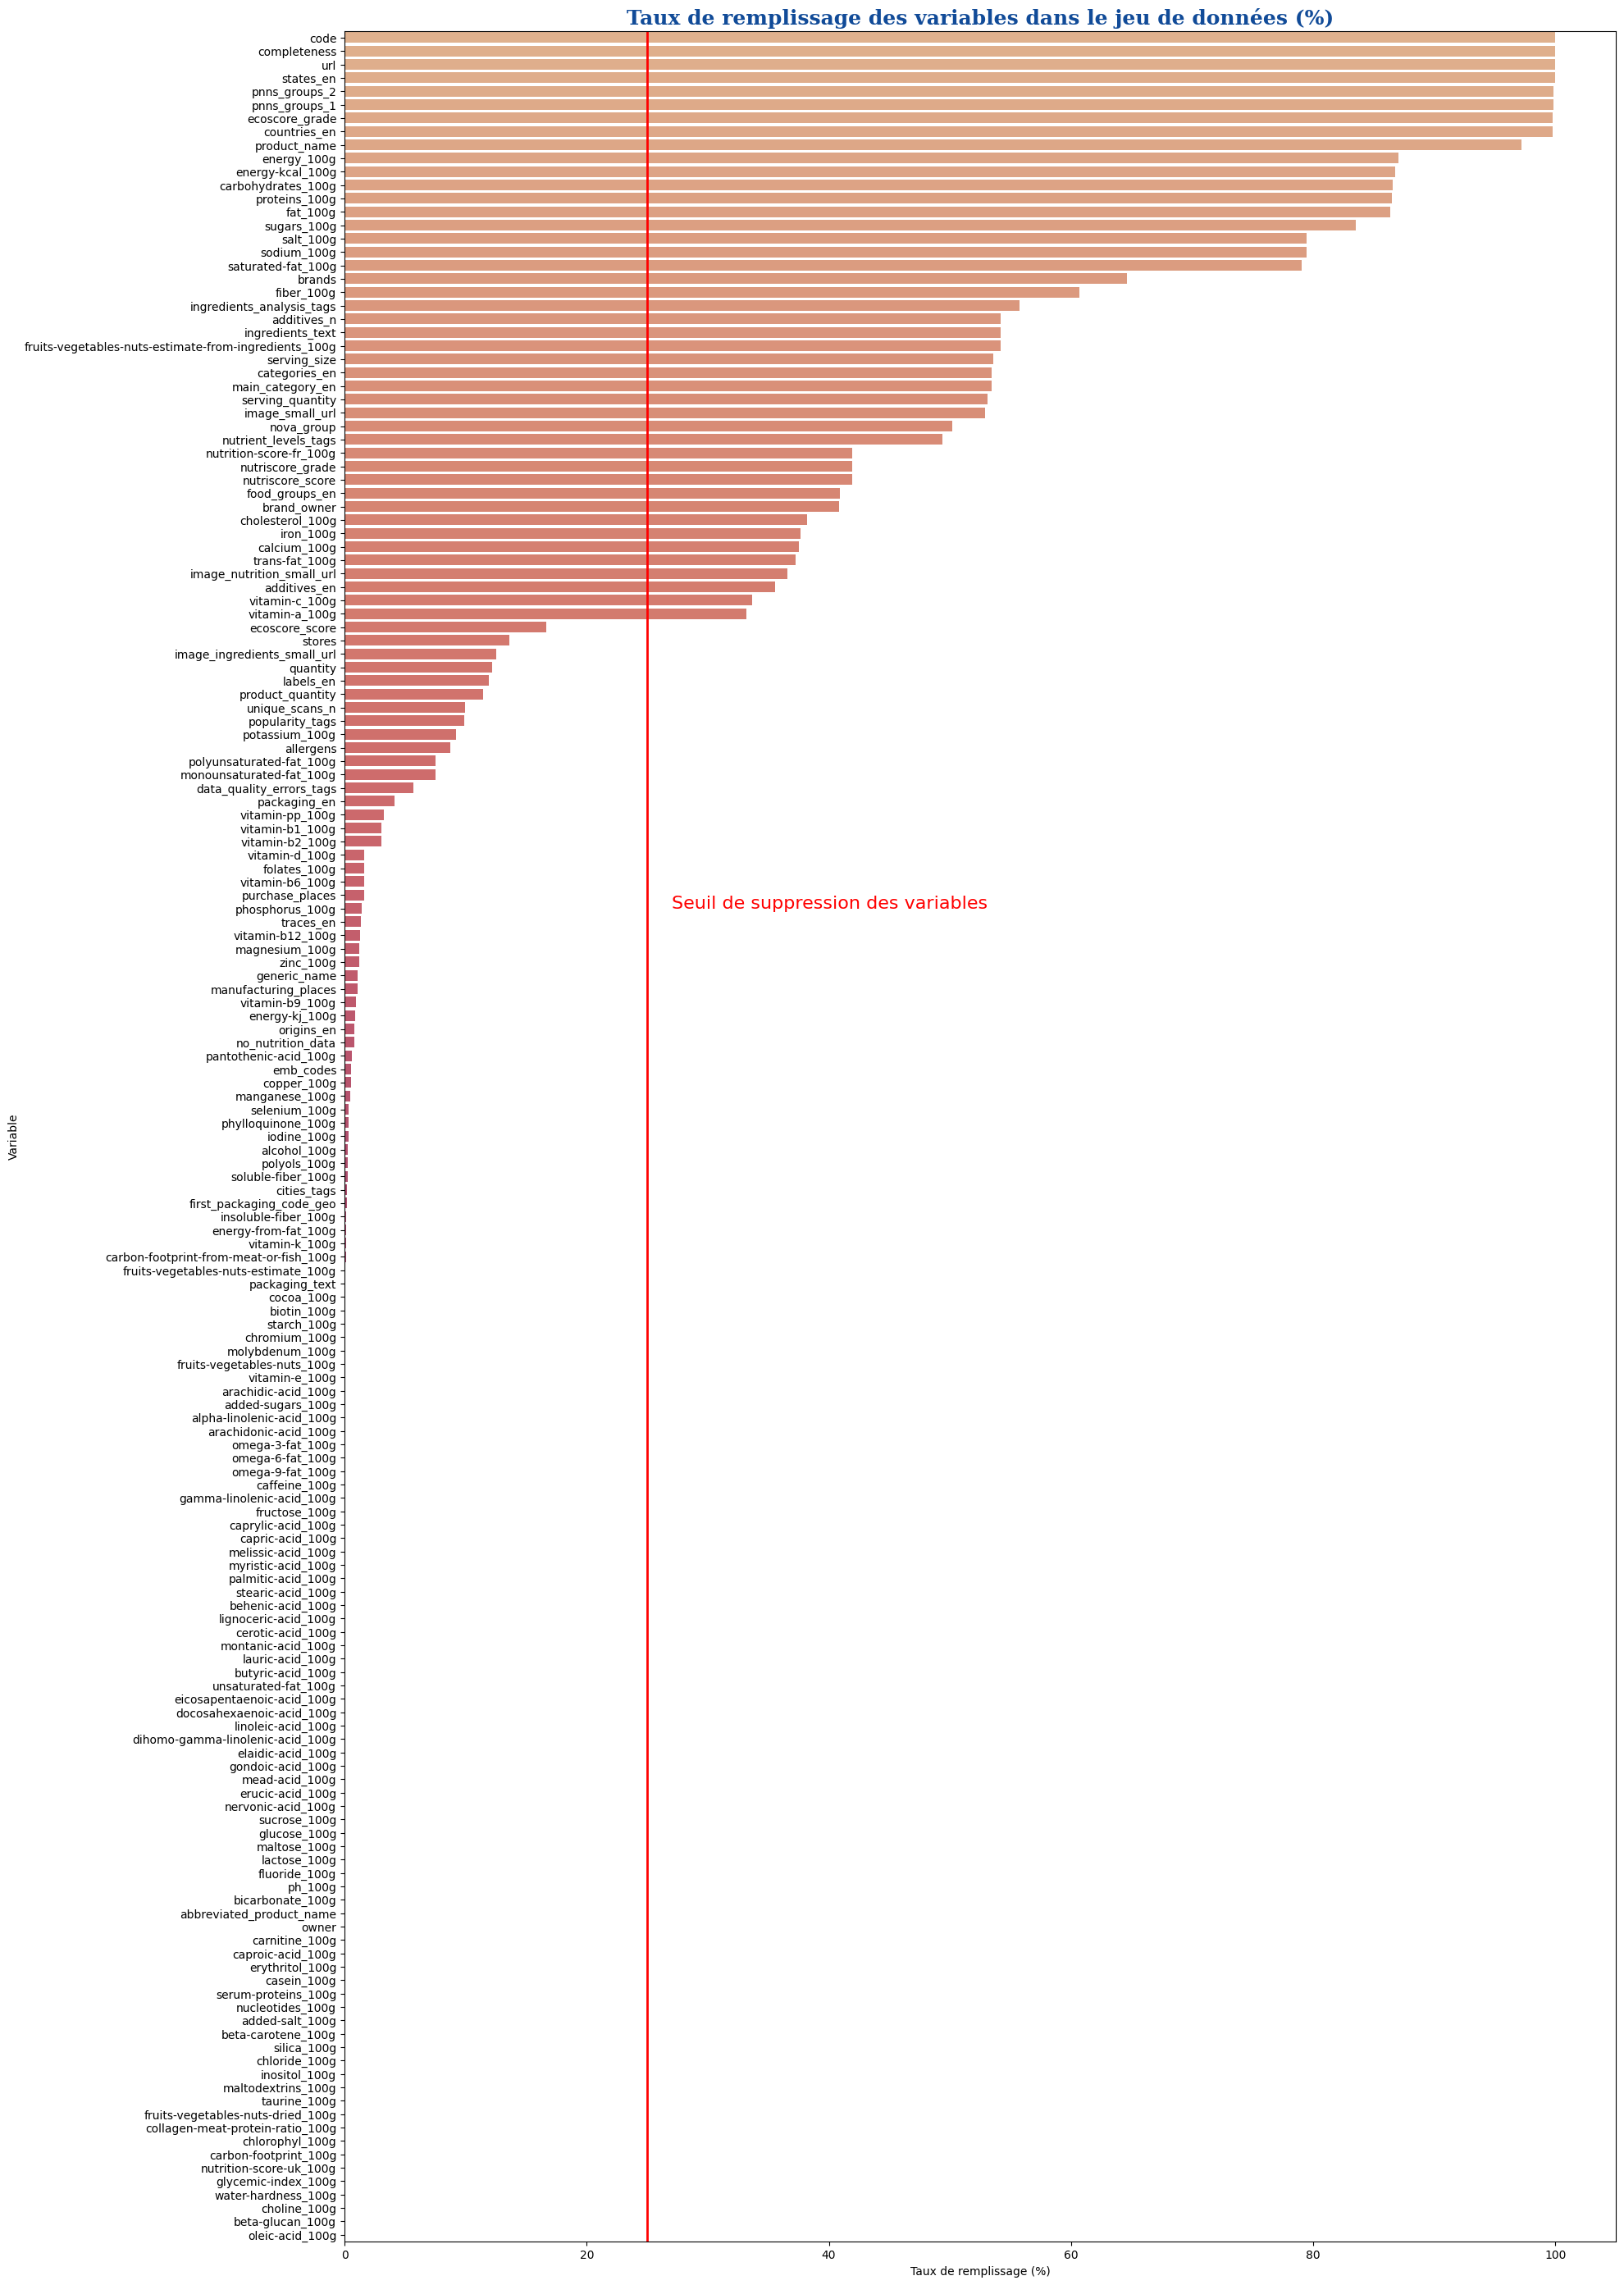

In [16]:
filling_features = null_factor(datas, 0)
filling_features["Taux_de_Null"] = 100-filling_features["Taux_de_Null"]
filling_features = filling_features.sort_values("Taux_de_Null", ascending=False) 

#Seuil de suppression
sup_threshold = 25

fig = plt.figure(figsize=(20, 35))

font_title = {'family': 'serif',
              'color':  '#114b98',
              'weight': 'bold',
              'size': 18,
             }

sns.barplot(x="Taux_de_Null", y="Variable", data=filling_features, palette="flare")
#Seuil pour suppression des varaibles
plt.axvline(x=sup_threshold, linewidth=2, color = 'r')
plt.text(sup_threshold+2, 65, 'Seuil de suppression des variables', fontsize = 16, color = 'r')

plt.title("Taux de remplissage des variables dans le jeu de données (%)", fontdict=font_title)
plt.xlabel("Taux de remplissage (%)")
plt.show()

In [18]:
#Liste des variables à conserver
features_to_conserve = list(filling_features.loc[filling_features['Taux_de_Null']>=sup_threshold, 'Variable'].values)
#Liste des variables supprimées
deleted_features = list(filling_features.loc[filling_features['Taux_de_Null']<sup_threshold, 'Variable'].values)

155 features sur 184 ont un taux de valeurs nulles supérieur à 50%, ce qui représente une très grosse part de données manquantes. **La majeure partie de ces variables ne peuvent pas être recalculées** puisqu'il s'agit de mesures physico-chimiques directes sur les produits.

Il reste à présent 50 features dans notre dataset. Pour la suite des analyses, nous aurons besoin d'un minimum d'informations sur **les nutriments** des produits. Ces données sont **suffixées avec** `_100g`. Nous allons donc **conserver les lignes pour lesquelles au moins une de ces features est complétée** :

In [19]:
def search_componant(df, suffix='_100g'):
  componant = []
  for col in df.columns:
      if '_100g' in col: componant.append(col)
  df_subset_columns = df[componant]
  return df_subset_columns

In [20]:
df_subset_nutients = search_componant(datas,'_100g')
df_subset_nutients.head()

energy-kj_100g  energy-kcal_100g  energy_100g  energy-from-fat_100g  \
0             NaN               NaN          NaN                   NaN   
1             NaN             165.0        690.0                   NaN   
2             NaN               NaN          NaN                   NaN   
3             NaN              57.0        238.0                   NaN   
4             NaN             375.0       1569.0                   NaN   

   fat_100g  saturated-fat_100g  butyric-acid_100g  caproic-acid_100g  \
0       NaN                 NaN                NaN                NaN   
1       2.0                2.00                NaN                NaN   
2       1.4                0.90                NaN                NaN   
3       0.2                0.10                NaN                NaN   
4       7.0                3.08                NaN                NaN   

   caprylic-acid_100g  capric-acid_100g  ...  \
0                 NaN               NaN  ...   
1                 NaN               NaN  ...   
2                 NaN               NaN  ...   
3                 NaN               NaN  ...   
4                 NaN               NaN  ...   

   carbon-footprint-from-meat-or-fish_100g  nutrition-score-fr_100g  \
0                                      NaN                      NaN   
1                                      NaN                      NaN   
2                                      NaN                      NaN   
3                                      NaN                     -5.0   
4                                      NaN                      NaN   

   nutrition-score-uk_100g  glycemic-index_100g  water-hardness_100g  \
0                      NaN                  NaN                  NaN   
1                      NaN                  NaN                  NaN   
2                      NaN                  NaN                  NaN   
3                      NaN                  NaN                  NaN   
4                      NaN                  NaN                  NaN   

   choline_100g  phylloquinone_100g  beta-glucan_100g  inositol_100g  \
0           NaN                 NaN               NaN            NaN   
1           NaN                 NaN               NaN            NaN   
2           NaN                 NaN               NaN            NaN   
3           NaN                 NaN               NaN            NaN   
4           NaN                 NaN               NaN            NaN   

   carnitine_100g  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  

[5 rows x 116 columns]

In [21]:
print('Lignes nutriments (_100g) vides: {}'.format(df_subset_nutients.isnull().all(axis=1).sum()))

Lignes nutriments (_100g) vides: 2018


In [22]:
datas = datas[df_subset_nutients.notnull().any(axis=1)]
datas.shape

(17982, 165)

Notre jeu de données est à présent débarassé des lignes et colonnes peu complétées. Nous allons à présent **rechercher et supprimer les doublons**.

In [23]:
# Suppression des doublons en fonction du code
datas.drop_duplicates(subset ="code", keep = 'last', inplace=True)

In [24]:
datas[(datas["product_name"].isnull()==False) 
      & (datas["brands"].isnull()==False)].groupby(by=["product_name","brands"])["code"].nunique().sort_values(ascending=False)

product_name                                                             brands                                           
Ferrero collection, fine assorted confections                            Ferrero Collection,  Ferrero U.S.A.  Incorporated    10
Pure whey protein                                                        Bulk                                                  9
Whey                                                                     Bulk                                                  7
Ice Cream                                                                The Kroger Co.                                        6
Pinto Beans                                                              Kroger                                                6
                                                                                                                              ..
Heidel confiserie, chocolate balls filled with milk cream and chocolate  Heidel Confiserie             

In [25]:
datas = datas[(datas["product_name"]!="🤬") 
              & (datas["brands"]!="🤬")]

In [26]:
# Suppression des doublons sur marque et produit en conservant les valeurs nulles
datas = datas[(~datas.duplicated(["product_name","brands"],keep="last")) 
      | ((datas['product_name'].isnull()) & (datas['brands'].isnull()))]

In [27]:
datas.shape

(16508, 165)

### <font color="#ea1c60" id="section_2">1.2. Variables redondantes</font>

Certaines variables dans le dataset sont en réalité des variables redondantes. C'est par exemple le cas des variables suffixées par `_tags` ou `_en` qui ne font que reprendre d'autres features traduites ou simplifiées.

Nous les avons donc supprimé au prealable

On remarque dans ces quelques exemples que les variables sont bien redondantes. Nous allons donc, lorsque la colonne suffixée `_en` existe, supprimer toutes les autres colonnes identiques non suffixées ou contenant `_tags` :

In [29]:
def search_redundant_col(df):
  redundant_columns = []
  for col in df.columns:
    if "_en" in col:
      en = col.replace('_en','')
      tags = col.replace('_en','_tags')
      print("{:<20} 'Sans suffixe' -> {} ; 'Suffixe _tags' -> {}".format(col,
                                                                        en in df.columns, tags in df.columns))
      if en in df.columns : 
        redundant_columns.append(en)
      if tags in df.columns : 
        redundant_columns.append(tags)
  
    if '_tags' in col:
      tags_2 = col.replace('_tags','')
      print("{:<20} 'Suffixe _tags' -> {} ;".format(tags_2, tags_2 in df.columns))
      if tags_2 in df.columns :
        redundant_columns.append(col)

  return redundant_columns

In [30]:
datas.drop(search_redundant_col(datas), axis=1, inplace=True)

packaging_en         'Sans suffixe' -> False ; 'Suffixe _tags' -> False
categories_en        'Sans suffixe' -> False ; 'Suffixe _tags' -> False
origins_en           'Sans suffixe' -> False ; 'Suffixe _tags' -> False
labels_en            'Sans suffixe' -> False ; 'Suffixe _tags' -> False
cities               'Suffixe _tags' -> False ;
countries_en         'Sans suffixe' -> False ; 'Suffixe _tags' -> False
ingredients_analysis 'Suffixe _tags' -> False ;
traces_en            'Sans suffixe' -> False ; 'Suffixe _tags' -> False
additives_en         'Sans suffixe' -> False ; 'Suffixe _tags' -> False
food_groups_en       'Sans suffixe' -> False ; 'Suffixe _tags' -> False
states_en            'Sans suffixe' -> False ; 'Suffixe _tags' -> False
nutrient_levels      'Suffixe _tags' -> False ;
data_quality_errors  'Suffixe _tags' -> False ;
popularity           'Suffixe _tags' -> False ;
main_category_en     'Sans suffixe' -> False ; 'Suffixe _tags' -> False


**Les dates également comportent une certaine redondance**. Entre les timestamp et les dates au format "yyyy-mm-dd", il est nécessaire d'en éliminer :

In [33]:
#datas['created_datetime'] = pd.to_datetime(datas['created_t'], unit='s')
#datas['last_modified_datetime'] = pd.to_datetime(datas['last_modified_t'], unit='s')
#datas = datas.drop(['created_t','last_modified_t'], axis=1)
#datas.head()

Nous pouvons à présent regarder la **distribution des contributions par année** :

In [34]:
add_per_year = datas[['created_datetime', 'code']].groupby(by=datas['created_datetime'].dt.year).nunique()

fig=plt.figure(figsize=(12,8))

sns.set_style("whitegrid")
sns.barplot(data=add_per_year, x=add_per_year.index, y='code', color='#00afe6')

plt.title("Evolution des créations de produits dans la base par année", fontdict=font_title)
plt.xlabel("Année de création")
plt.ylabel("Nombre de créations")
plt.show()

KeyError: ignored

Les années de 2012 à 2016 sont visiblement bien moins représentées que les années 2017 à 2019. La mise en place du Nutri-Score a été votée dans le cadre de la **loi Santé de 2016**.

In [35]:
datas.shape

(16508, 165)

A présent, notre dataset compte 40 variables qui ne contienent plus de redondance et 1 124 710 lignes. Nous allons maintenant nous intéresser à une variable importante : le pays.

### <font color="#ea1c60" id="section_3">1.3. Les pays de l'analyse</font>

Regardons tout d'abord le nombre de pays représentés *(s'il est trop élevé, c'est que des erreurs existent)*

In [36]:
countries = datas.groupby(by="countries_en").nunique()

In [37]:
countries[['code']].head()

code
countries_en                        
Andorra                            1
Australia                         15
Australia,France                   1
Austria                            1
Austria,Deutschland,Frankreich     1

Plusieurs pays sont regroupés dans la même variable, nous allons devoir effectuer un split du texte pour visualiser tout nos pays :

In [38]:
def split_words(df, column = 'countries_en'):
  list_words = set()
  for word in df[column].str.split(','):
    if isinstance(word, float):
      continue
    list_words = set().union(word, list_words)
  return list(list_words)

In [39]:
#Liste contenant tous les pays du jeu de données (bons ou mauvais)
list_countries = split_words(datas, 'countries_en')

In [40]:
print("Nombre de pays représentés : {}".format(len(list_countries)))

Nombre de pays représentés : 75


Nous avons traiter les pays pour garder anglais.

### <font color="#ea1c60" id="section_4">1.4. Les catégories de produits</font>

Intéressons nous à présent à la catégorisation des produits. 4 variables représentent cette catégorisation de manière plus ou moins précise : `categories_en`, `main_category_en`, `pnns_groups_1`, `pnns_groups_2`.

In [42]:
datas[['categories_en','pnns_groups_1','pnns_groups_2','main_category_en',]].sample(10)

categories_en  \
16045                                                NaN   
12656  Dairies,Fermented foods,Fermented milk product...   
8137                                        Frozen foods   
14791                                       Frozen foods   
9441   Dairies,Fermented foods,Desserts,Fermented mil...   
1492                                                 NaN   
3241                                                 NaN   
6559                                                 NaN   
797                                                  NaN   
15642  Plant-based foods and beverages,Plant-based fo...   

                 pnns_groups_1    pnns_groups_2 main_category_en  
16045                  unknown          unknown              NaN  
12656  Milk and dairy products           Cheese          Cheeses  
8137                   unknown          unknown     Frozen foods  
14791                  unknown          unknown     Frozen foods  
9441   Milk and dairy products  Milk and yogurt          Yogurts  
1492                   unknown          unknown              NaN  
3241                   unknown          unknown              NaN  
6559                   unknown          unknown              NaN  
797                    unknown          unknown              NaN  
15642     Cereals and potatoes            Bread     Bagel breads

Nous allons regarder le **nombre total de catégories représentées** :

In [43]:
categories = split_words(df = datas, column = 'categories_en')
print("{} catégories sont représentées dans le jeu de données.".format(len(categories)))

1466 catégories sont représentées dans le jeu de données.


Ici également, nous allons regarder les **catégories les plus représentées**, après avoir remplacé les valeurs nulles et complété les valeurs inconnues des pnns avec la catégorie principale :

In [44]:
datas['categories_en'] = np.where((datas['categories_en'].isnull()==True), "unknown", 
                                 np.where(datas['categories_en'] == "", "unknown", datas['categories_en']))
datas['main_category_en'] = np.where((datas['main_category_en'].isnull()==True), "unknown", 
                                 np.where(datas['main_category_en'] == "", "unknown", datas['main_category_en']))
datas['pnns_groups_1'] = np.where((datas['pnns_groups_1'].isnull()==True), "unknown", 
                                 np.where(datas['pnns_groups_1'] == "", "unknown", datas['pnns_groups_1']))
datas['pnns_groups_2'] = np.where((datas['pnns_groups_2'].isnull()==True), "unknown", 
                                 np.where(datas['pnns_groups_2'] == "", "unknown", datas['pnns_groups_2']))

In [4]:
def top_words(df, column="countries_en", nb_top=10):
  count_keyword = dict()
  for index, col in df[column].iteritems():
    if isinstance(col, float):
      continue
    for word in col.split(','):
      if word in count_keyword.keys():
        count_keyword[word] += 1
      else :
        count_keyword[word] = 1
  
  keyword_top = []
  for k,v in count_keyword.items():
    keyword_top.append([k,v])
  keyword_top.sort(key = lambda x:x[1], reverse = True)

  return keyword_top[:nb_top]

In [5]:
df_top_categories = pd.DataFrame(top_words(df=datas, column="categories_en", nb_top=10), 
                                 columns=["Keyword","count"])
df_top_categories

<ipython-input-4-7567275aed5e>:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, col in df[column].iteritems():


Keyword  count
0    Plant-based foods and beverages   3133
1                             Snacks   2784
2                  Plant-based foods   2689
3                       Sweet snacks   1739
4                         Condiments   1035
5               Cereals and potatoes    986
6  Fruits and vegetables based foods    957
7                          Groceries    954
8                          Beverages    865
9                    Confectioneries    846

Il existe donc également une grande disparité dans les catégories représentées et les "unknown", les catégories inconnues l'emportent. 

Pour une meilleure visualisation, nous allons représenter le top 100 des catégories dans un nuage de mots grâce à la librairie `WordCloud` :

In [48]:
from wordcloud import WordCloud

def plot_world_cloud(df=datas,column="categories_en",nb_top=100):
  fig = plt.figure(1, figsize=(20,15))
  ax1 = fig.add_subplot(1,1,1)

  words = dict()
  trunc_occurences = top_words(df=df, column=column, nb_top=nb_top)
  for s in trunc_occurences:
    words[s[0]] = s[1]

  word_cloud = WordCloud(width=900,height=500, normalize_plurals=False,
                        background_color="white")
  word_cloud.generate_from_frequencies(words)
  ax1.imshow(word_cloud, interpolation="bilinear")
  ax1.axis('off')
  plt.title("Nuage de mots des {} meilleures {}\n".format(nb_top, column), fontsize=22)
  plt.show()

<ipython-input-46-7567275aed5e>:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, col in df[column].iteritems():


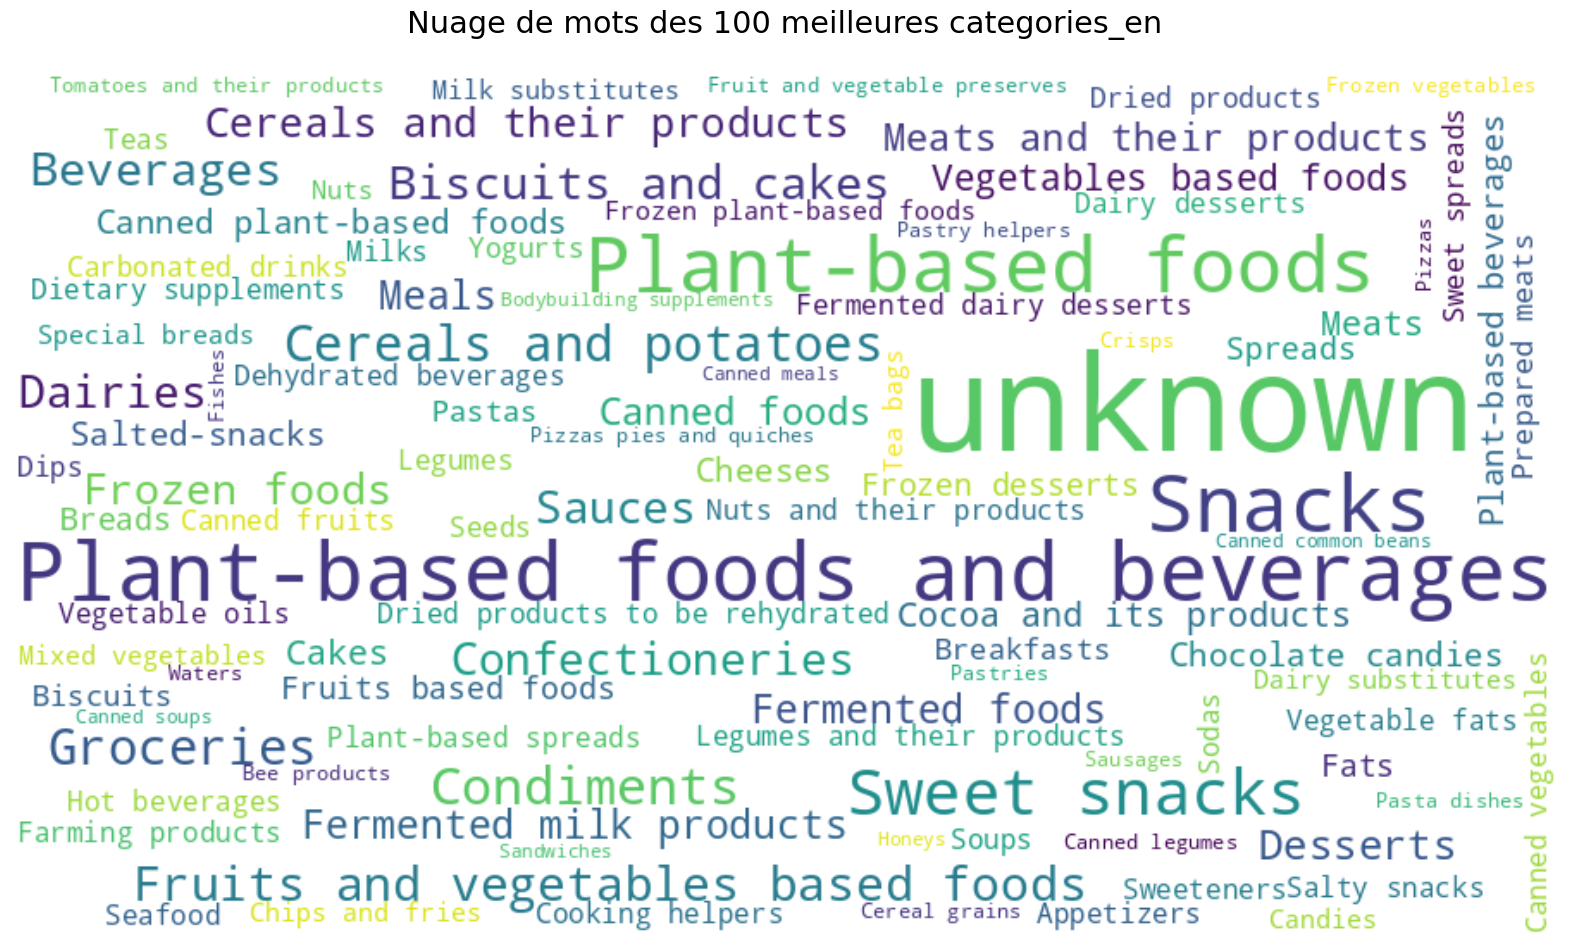

In [49]:
plot_world_cloud(df=datas,column="categories_en",nb_top=100)

Passons à présent aux variables `pnns_groups_1` et `pnns_groups_2` qui nous apporteront des informations plus précises :

In [50]:
pnns_groups_1 = split_words(df = datas, column = 'pnns_groups_1')
pnns_groups_2 = split_words(df = datas, column = 'pnns_groups_2')
print("{} catégories sont représentées dans la variable pnns_group_1.".format(len(pnns_groups_1)))
print("{} catégories sont représentées dans la variable pnns_group_2.".format(len(pnns_groups_2)))

11 catégories sont représentées dans la variable pnns_group_1.
39 catégories sont représentées dans la variable pnns_group_2.


In [51]:
pnns_groups_1

['Fruits and vegetables',
 'Fish Meat Eggs',
 'unknown',
 'Fat and sauces',
 'Beverages',
 'Salty snacks',
 'Sugary snacks',
 'Alcoholic beverages',
 'Milk and dairy products',
 'Composite foods',
 'Cereals and potatoes']

On voit ici que certaines catégories sont présentes plusieurs fois mais orthographiées différement :
- 'Cereals and potatoes' et 'cereals-and-potatoes'
- 'fruits-and-vegetables' et 'Fruits and vegetables'
- ...

Nous allons donc corriger le problème en passant le texte en miniscule et en remplaçant les caractères spéciaux par un espace :

In [52]:
datas["pnns_groups_1"] = datas["pnns_groups_1"].str.lower().str.replace('-', ' ')

In [53]:
pnns_groups_1 = split_words(df = datas, column = 'pnns_groups_1')
print("{} catégories sont représentées dans la variable pnns_group_1.".format(len(pnns_groups_1)))
print(pnns_groups_1)

11 catégories sont représentées dans la variable pnns_group_1.
['fruits and vegetables', 'unknown', 'cereals and potatoes', 'fish meat eggs', 'salty snacks', 'fat and sauces', 'alcoholic beverages', 'composite foods', 'sugary snacks', 'beverages', 'milk and dairy products']


In [54]:
pnns_groups_2

['Sweets',
 'Milk and yogurt',
 'Potatoes',
 'Pizza pies and quiches',
 'Fruits',
 'Sandwiches',
 'Fats',
 'Vegetables',
 'Cheese',
 'Teas and herbal teas and coffees',
 'unknown',
 'Soups',
 'Dried fruits',
 'Biscuits and cakes',
 'Dressings and sauces',
 'Processed meat',
 'Cereals',
 'Dairy desserts',
 'Fish and seafood',
 'Offals',
 'Ice cream',
 'Alcoholic beverages',
 'Legumes',
 'Unsweetened beverages',
 'Breakfast cereals',
 'Meat',
 'Chocolate products',
 'Eggs',
 'Sweetened beverages',
 'Pastries',
 'Waters and flavored waters',
 'Nuts',
 'Appetizers',
 'Artificially sweetened beverages',
 'Plant-based milk substitutes',
 'One-dish meals',
 'Salty and fatty products',
 'Bread',
 'Fruit juices']

In [55]:
datas["pnns_groups_2"] = datas["pnns_groups_2"].str.lower().str.replace('-', ' ').replace('pizza pies and quiche','pizza pies and quiches')
pnns_groups_2 = split_words(df = datas, column = 'pnns_groups_2')
print("{} catégories sont représentées dans la variable pnns_group_2.".format(len(pnns_groups_2)))

39 catégories sont représentées dans la variable pnns_group_2.


<ipython-input-46-7567275aed5e>:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, col in df[column].iteritems():


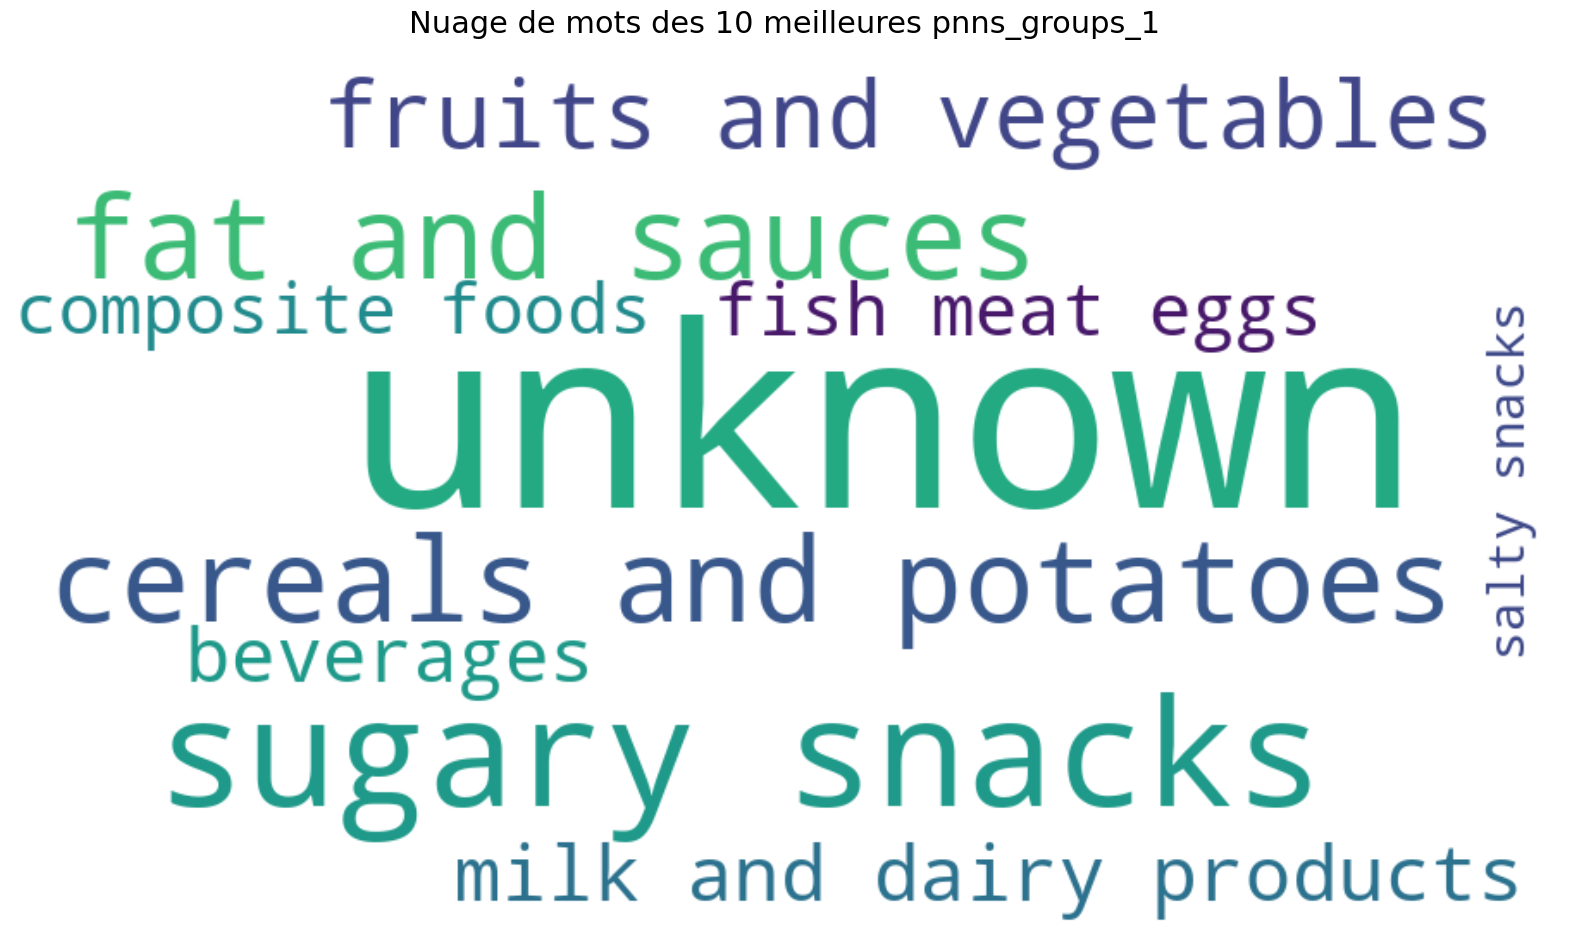

In [56]:
plot_world_cloud(df=datas,column="pnns_groups_1",nb_top=10)

<ipython-input-46-7567275aed5e>:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, col in df[column].iteritems():


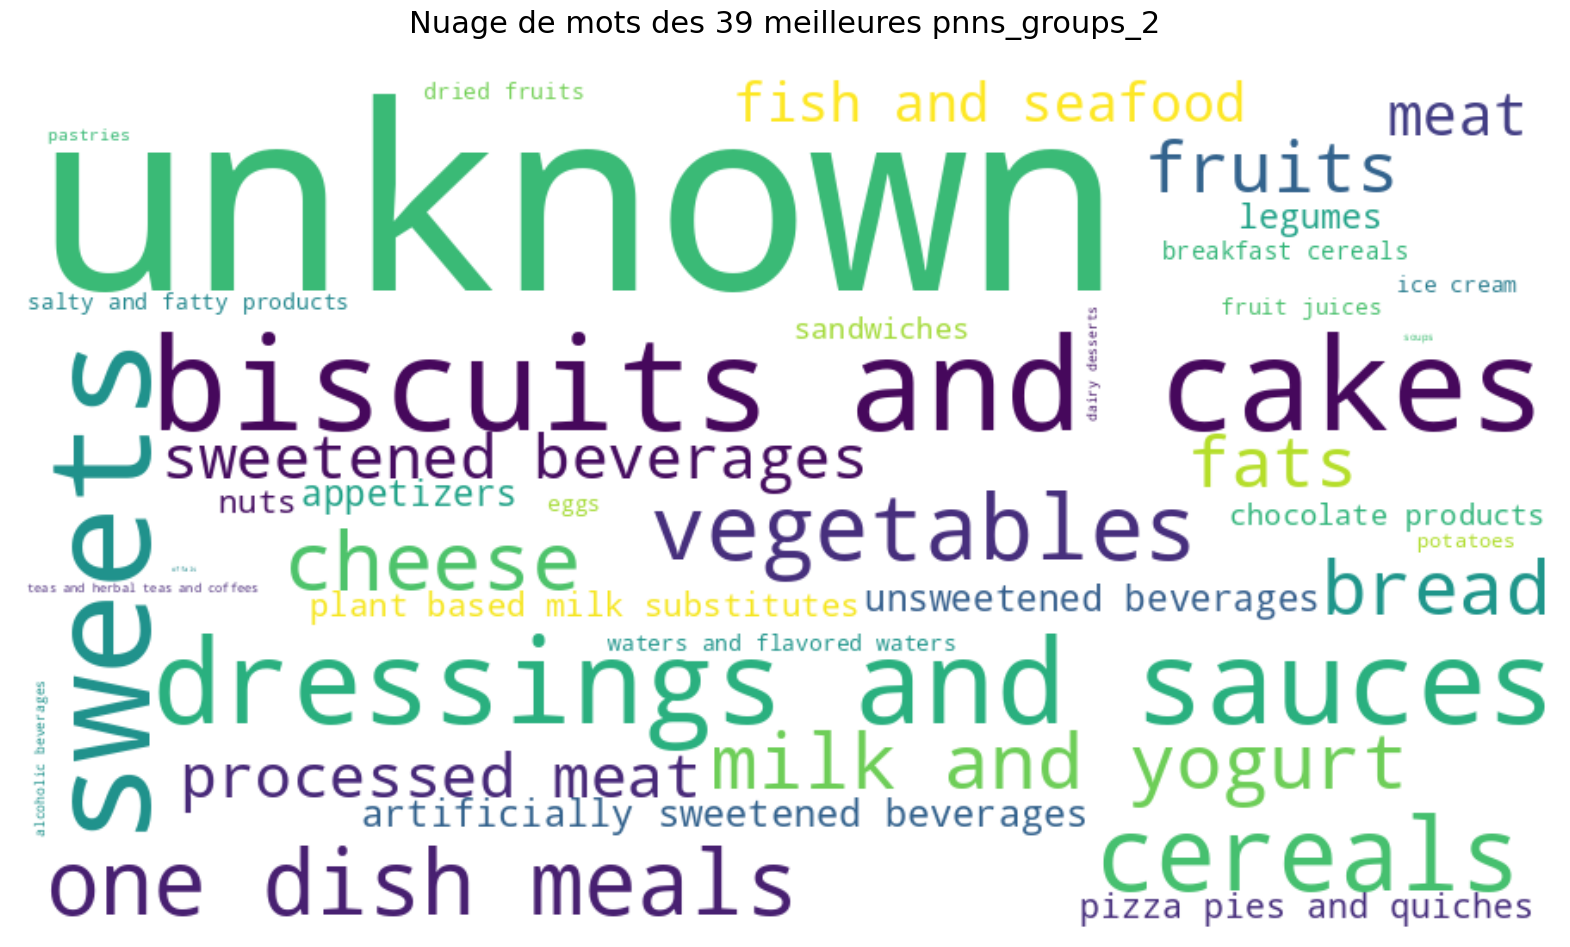

In [57]:
plot_world_cloud(df=datas,column="pnns_groups_2",nb_top=len(pnns_groups_2))

In [58]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16508 entries, 1 to 19999
Columns: 165 entries, code to carnitine_100g
dtypes: float64(126), object(39)
memory usage: 20.9+ MB


### <font color="#ea1c60" id="section_5">1.5. Compléter les valeurs manquantes ou aberrantes</font>

Le jeu de données est nettoyé mais comme le montre les informations ci-dessus, il reste un grand nombre de valeurs manquantes qu'il va falloir compléter mais également des outliers à identifier.

Regardons dans un premier temps une rapide description du Dataset :

In [59]:
datas.describe()

abbreviated_product_name  serving_quantity  additives_n  \
count                       0.0       9647.000000  9901.000000   
mean                        NaN         80.799036     2.879608   
std                         NaN        369.678944     3.898076   
min                         NaN          0.000000     0.000000   
25%                         NaN         28.000000     0.000000   
50%                         NaN         40.000000     1.000000   
75%                         NaN        100.000000     4.000000   
max                         NaN      35371.000000    33.000000   

       nutriscore_score  nova_group  ecoscore_score  product_quantity  owner  \
count       7628.000000  9093.00000     2836.000000      1.876000e+03    0.0   
mean           9.585737     3.47663       49.779267      1.420270e+03    NaN   
std            9.087089     0.97642       22.281618      3.037230e+04    NaN   
min          -11.000000     1.00000      -20.000000      5.000000e-01    NaN   
25%            2.000000     3.00000       34.000000      2.097500e+02    NaN   
50%           10.000000     4.00000       49.000000      3.401943e+02    NaN   
75%           16.000000     4.00000       72.000000      5.000000e+02    NaN   
max           36.000000     4.00000      120.000000      1.250000e+06    NaN   

       unique_scans_n  completeness  ...  \
count     1629.000000  16508.000000  ...   
mean         1.295273      0.443822  ...   
std          1.017951      0.118726  ...   
min          1.000000      0.100000  ...   
25%          1.000000      0.375000  ...   
50%          1.000000      0.462500  ...   
75%          1.000000      0.500000  ...   
max         21.000000      1.100000  ...   

       carbon-footprint-from-meat-or-fish_100g  nutrition-score-fr_100g  \
count                                21.000000              7628.000000   
mean                                457.310000                 9.585737   
std                                 382.476671                 9.087089   
min                                  73.990000               -11.000000   
25%                                  98.000000                 2.000000   
50%                                 401.800000                10.000000   
75%                                 636.400000                16.000000   
max                                1413.400000                36.000000   

       nutrition-score-uk_100g  glycemic-index_100g  water-hardness_100g  \
count                      0.0                  0.0                  0.0   
mean                       NaN                  NaN                  NaN   
std                        NaN                  NaN                  NaN   
min                        NaN                  NaN                  NaN   
25%                        NaN                  NaN                  NaN   
50%                        NaN                  NaN                  NaN   
75%                        NaN                  NaN                  NaN   
max                        NaN                  NaN                  NaN   

       choline_100g  phylloquinone_100g  beta-glucan_100g  inositol_100g  \
count           0.0           54.000000               0.0            0.0   
mean            NaN            0.000032               NaN            NaN   
std             NaN            0.000076               NaN            NaN   
min             NaN            0.000006               NaN            NaN   
25%             NaN            0.000006               NaN            NaN   
50%             NaN            0.000007               NaN            NaN   
75%             NaN            0.000028               NaN            NaN   
max             NaN            0.000508               NaN            NaN   

       carnitine_100g  
count             0.0  
mean              NaN  
std               NaN  
min               NaN  
25%               NaN  
50%               NaN  
75%               NaN  
max               NaN  

[8 rows x 126 columns]

On remarque déjà que les valeurs minimum et maximum de **certaines variables** (comme les nutriments ou la valeur energetique) **peuvent contenir des valeurs aberrantes**, ce qui impacte également l'écart-type et donc la variance.

In [60]:
datas[datas['energy_100g'] == datas['energy_100g'].max()]

code                                                url  \
6998  0010000071067589  http://world-en.openfoodfacts.org/product/0010...   

                    product_name  abbreviated_product_name generic_name  \
6998  Custom Chicken Panini wawa                       NaN          NaN   

     quantity packaging_en packaging_text brands categories_en  ...  \
6998      NaN          NaN            NaN    NaN       unknown  ...   

     carbon-footprint-from-meat-or-fish_100g nutrition-score-fr_100g  \
6998                                     NaN                     NaN   

     nutrition-score-uk_100g glycemic-index_100g water-hardness_100g  \
6998                     NaN                 NaN                 NaN   

     choline_100g phylloquinone_100g beta-glucan_100g inositol_100g  \
6998          NaN                NaN              NaN           NaN   

     carnitine_100g  
6998            NaN  

[1 rows x 165 columns]

Ici, ce produit qui possède la plus grande valeur energétique n'est quasi pas complété. Le manque le nom du produit, les catégories et toutes les valeurs nutritionnelles. Nous allons **supprimer tous les produits qui n'ont ni nom, ni catégorie** et qui ne pourront donc être clairement identifiés.

In [61]:
datas_cleaned = datas[~((datas.product_name.isnull()) 
                        & ((datas.pnns_groups_1 == "unknown") 
                           | (datas.main_category_en == "unknown")))]

In [62]:
datas_cleaned[((datas_cleaned.pnns_groups_1 == "unknown") & (datas_cleaned.main_category_en == "unknown") &
              (datas_cleaned.pnns_groups_2 == "unknown") & (datas_cleaned.categories_en == "unknown"))].shape[0]

7083

Il reste tout de même **510 484 produits qui ne contiennent aucune indication de catégorie**.

Afin de pouvoir calculer des indicateurs empiriques correctes, nous allons remplacer par des valeurs nulles tous les max et min aberrants *(0, -1 ou 999999...)* :

In [65]:
#On repère les numerical_features
numerical_features = list(datas_cleaned.select_dtypes(include=["float64","int64"]).columns)
#On supprime les nutriscores qui eux peuvent être négatifs
numerical_features.remove('nutriscore_score')
numerical_features.remove('nutrition-score-fr_100g')
#numerical_features.remove('ingredients_that_may_be_from_palm_oil_n')
#numerical_features.remove('ingredients_from_palm_oil_n')
numerical_features.remove('nova_group')

In [66]:
#On supprime les lignes dont toutes les numerical_features sont à 0 ou nulles
datas_cleaned = datas_cleaned.loc[~((datas_cleaned[numerical_features]==0) | (datas_cleaned[numerical_features].isnull())).all(axis=1)]

In [67]:
#On supprime les lignes contenant des valeurs négatives et des max aberrants
datas_cleaned = datas_cleaned[~(datas_cleaned[numerical_features] < 0).any(axis=1)]
datas_cleaned = datas_cleaned[~(datas_cleaned[numerical_features].isin([999999,9999999])).any(axis=1)]

Les variables suffixées avec `_100g` nous indiquent la quantité de nutriment pour 100 grammes de produit. Les valeurs renseignées ne peuvent donc logiquement pas excéder 100. Nous allons donc **supprimer les lignes dont au moins 1 des variables de nutriments est supérieur au seuil** :

In [68]:
g_per_100g_features = ['proteins_100g','fat_100g','carbohydrates_100g','sugars_100g','salt_100g',
                       'sodium_100g','saturated-fat_100g','fiber_100g']
datas_cleaned = datas_cleaned[~(datas_cleaned[g_per_100g_features] > 100).any(axis=1)]

D'autre part, les valeurs de `saturated-fat_100g` ne peuvent pas être supérieurs à `fat_100g`, de même pour les valeurs de `sodium_100g` qui ne peuvent pas être supérieurs à `salt_100g`.     
Nous allons donc supprimer les lignes qui remplissent ces conditions :

In [69]:
datas_cleaned = datas_cleaned[~((datas_cleaned['saturated-fat_100g'] > datas_cleaned['fat_100g']) 
                                | (datas_cleaned['sodium_100g'] > datas_cleaned['salt_100g']))]

Enfin, les densité d'energie maximales pour 100g sont de 3700 kJ/100g *(source [Wikipedia](https://en.wikipedia.org/wiki/Food_energy))*. Nous allons donc supprimer toutes les lignes dont la variable `energy_100g` est supérieur à 3700 *(ou 900 kcal/100g)*.

In [70]:
datas_cleaned = datas_cleaned[~((datas_cleaned['energy_100g'] > 3700) 
                                | (datas_cleaned['energy-kcal_100g'] > 900))]

Pour les variables restantes, nous allons nous baser sur la médiane et l'écart-type pour éliminer les outliers. Commençons par afficher la dispersion des données et ces métriques :

In [71]:
sigma_features = ['additives_n','serving_quantity']

In [72]:
#On initialise l'écart-type et la médiane
sigma = [0 for _ in range(len(sigma_features))]
median = [0 for _ in range(len(sigma_features))]
#Puis on complètes les valeurs avec le dataset sans les valeurs nulles
for i in range(len(sigma_features)):
  median[i] = datas_cleaned[pd.notnull(datas_cleaned[sigma_features[i]])][sigma_features[i]].median()
  serie = datas_cleaned[pd.notnull(datas_cleaned[sigma_features[i]])][sigma_features[i]]
  serie = serie.sort_values()
  sigma[i] = np.std(serie[:-25])

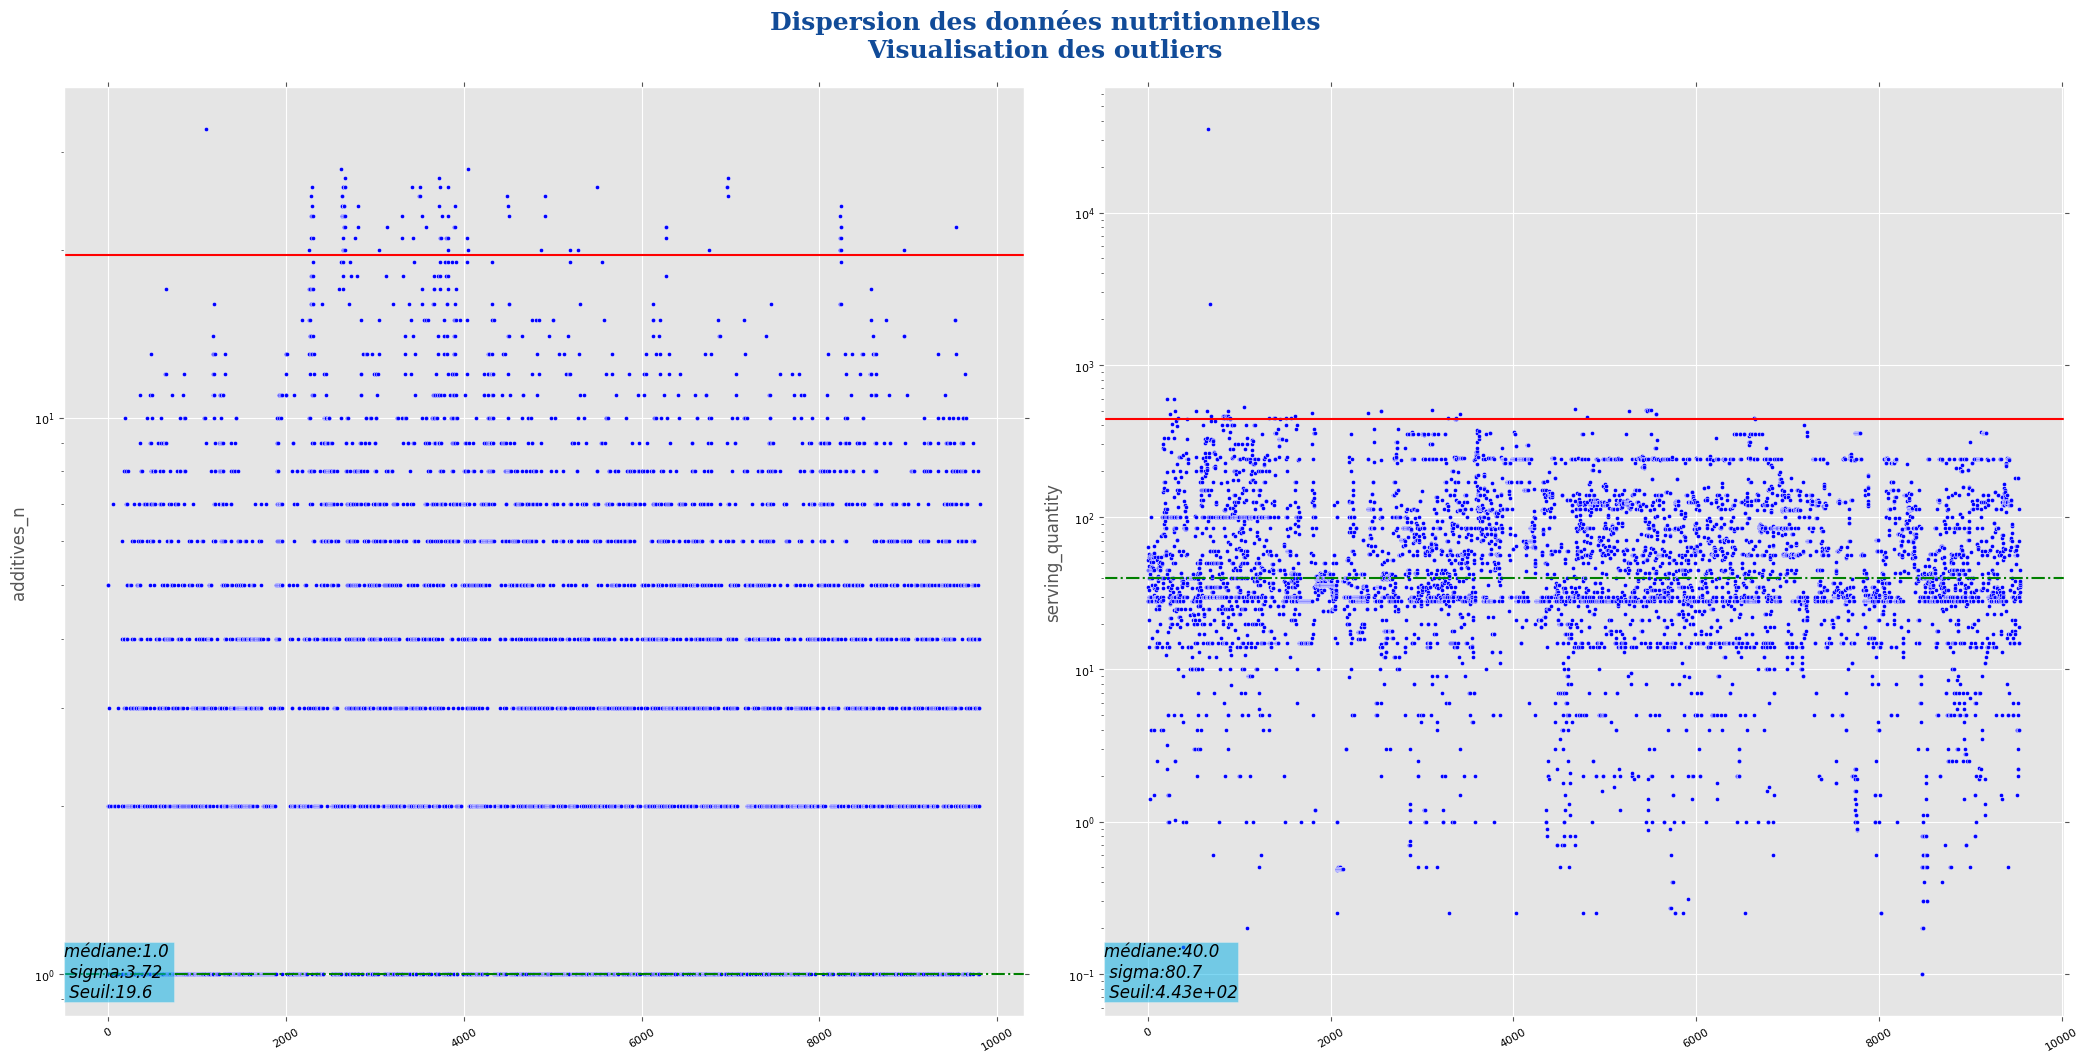

In [73]:
plt.style.use('ggplot')
tPlot, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(21,10))
axes = np.array(axes)

i=0
for ax in axes.reshape(-1):
    colonne = sigma_features[i]
    test = datas_cleaned[pd.notnull(datas_cleaned[colonne])][colonne]
    ax.tick_params(labelcolor='black',top='off',bottom='on',left='on',right='off',labelsize=8)
    ax.set_ylabel(colonne.rstrip("_100g"), fontsize = 12)
    ax.set_yscale("log")
    ax.plot(list(test), 'b.', markeredgewidth = 0.3, markeredgecolor='w')
    for tick in ax.get_xticklabels():
        tick.set_rotation(30)
    ax.axhline(y=median[i], color='g', linestyle='dashdot')
    ax.axhline(y=median[i] + 5*sigma[i], color='r', linestyle='-')
    ax.text(0., 0.02, 'médiane:{:.3} \n sigma:{:.3} \n Seuil:{:.3}'.format(median[i], sigma[i], (median[i] + 5*sigma[i])),
            style='italic', transform=ax.transAxes, fontsize = 12,
            bbox={'facecolor':'#00afe6', 'alpha':0.5, 'pad':0})
    i += 1

tPlot.text(0.5, 1.01, r"Dispersion des données nutritionnelles" "\n" "Visualisation des outliers", ha='center', fontdict=font_title)
plt.tight_layout()

Ces représentations nous indiquent clairement les éventuels **outliers qui diffèrent de la valeur médiane de plus de 5 fois l'écart-type ($5\sigma$ - valeur sélectionnée après plusieurs essais)**.

In [74]:
for i in range(len(sigma_features)):
    col = sigma_features[i]
    threshold = (median[i] + 5*sigma[i])
    print('{:30}: suppression de la ligne si valeur > {}'.format(col, round(threshold,3)))
    mask = datas_cleaned[col] > threshold
    datas_cleaned = datas_cleaned.drop(datas_cleaned[mask].index)

additives_n                   : suppression de la ligne si valeur > 19.605
serving_quantity              : suppression de la ligne si valeur > 443.482


In [75]:
datas_cleaned.shape

(16159, 165)

In [78]:
datas_cleaned.describe()

abbreviated_product_name  serving_quantity  additives_n  \
count                       0.0       9391.000000  9672.000000   
mean                        NaN         74.966512     2.665529   
std                         NaN         78.559130     3.305726   
min                         NaN          0.000000     0.000000   
25%                         NaN         28.000000     0.000000   
50%                         NaN         40.000000     1.000000   
75%                         NaN        100.000000     4.000000   
max                         NaN        443.000000    19.000000   

       nutriscore_score   nova_group  ecoscore_score  product_quantity  owner  \
count       7448.000000  8877.000000     2777.000000      1.840000e+03    0.0   
mean           9.442535     3.469415       50.425279      1.437591e+03    NaN   
std            9.048483     0.981977       21.623487      3.066767e+04    NaN   
min          -11.000000     1.000000        0.000000      5.000000e-01    NaN   
25%            1.000000     3.000000       34.000000      2.080000e+02    NaN   
50%           10.000000     4.000000       49.000000      3.401943e+02    NaN   
75%           16.000000     4.000000       72.000000      5.000000e+02    NaN   
max           36.000000     4.000000      120.000000      1.250000e+06    NaN   

       unique_scans_n  completeness  ...  \
count     1590.000000  16159.000000  ...   
mean         1.299371      0.444361  ...   
std          1.026858      0.118191  ...   
min          1.000000      0.200000  ...   
25%          1.000000      0.375000  ...   
50%          1.000000      0.462500  ...   
75%          1.000000      0.500000  ...   
max         21.000000      1.100000  ...   

       carbon-footprint-from-meat-or-fish_100g  nutrition-score-fr_100g  \
count                                18.000000              7448.000000   
mean                                516.691111                 9.442535   
std                                 381.849221                 9.048483   
min                                  73.990000               -11.000000   
25%                                 179.830000                 1.000000   
50%                                 523.675000                10.000000   
75%                                 656.267500                16.000000   
max                                1413.400000                36.000000   

       nutrition-score-uk_100g  glycemic-index_100g  water-hardness_100g  \
count                      0.0                  0.0                  0.0   
mean                       NaN                  NaN                  NaN   
std                        NaN                  NaN                  NaN   
min                        NaN                  NaN                  NaN   
25%                        NaN                  NaN                  NaN   
50%                        NaN                  NaN                  NaN   
75%                        NaN                  NaN                  NaN   
max                        NaN                  NaN                  NaN   

       choline_100g  phylloquinone_100g  beta-glucan_100g  inositol_100g  \
count           0.0           54.000000               0.0            0.0   
mean            NaN            0.000032               NaN            NaN   
std             NaN            0.000076               NaN            NaN   
min             NaN            0.000006               NaN            NaN   
25%             NaN            0.000006               NaN            NaN   
50%             NaN            0.000007               NaN            NaN   
75%             NaN            0.000028               NaN            NaN   
max             NaN            0.000508               NaN            NaN   

       carnitine_100g  
count             0.0  
mean              NaN  
std               NaN  
min               NaN  
25%               NaN  
50%               NaN  
75%               NaN  
max               NaN  

[8 rows x 126 columns]

Après ces quelques opérations de nettoyage, les valeurs médianes, d'écarts-type, de minimum et maximum sont plus cohérentes. Nous allons pouvoir exploiter ces données pour **estimer les valeurs manquantes**.

Nous allons déjà regarder la **distribution de ces variables et définir si elles suivent une loi normale**, ce qui nous aidera à prendre une décision pour la méthode d'imputation des valeurs manquantes.

La colonne abbreviated_product_name ne contient pas suffisamment de données pour être tracée.
La colonne owner ne contient pas suffisamment de données pour être tracée.
La colonne butyric-acid_100g ne contient pas suffisamment de données pour être tracée.
La colonne caproic-acid_100g ne contient pas suffisamment de données pour être tracée.
La colonne caprylic-acid_100g ne contient pas suffisamment de données pour être tracée.
La colonne capric-acid_100g ne contient pas suffisamment de données pour être tracée.
La colonne lauric-acid_100g ne contient pas suffisamment de données pour être tracée.
La colonne myristic-acid_100g ne contient pas suffisamment de données pour être tracée.
La colonne palmitic-acid_100g ne contient pas suffisamment de données pour être tracée.
La colonne stearic-acid_100g ne contient pas suffisamment de données pour être tracée.


ValueError: ignored

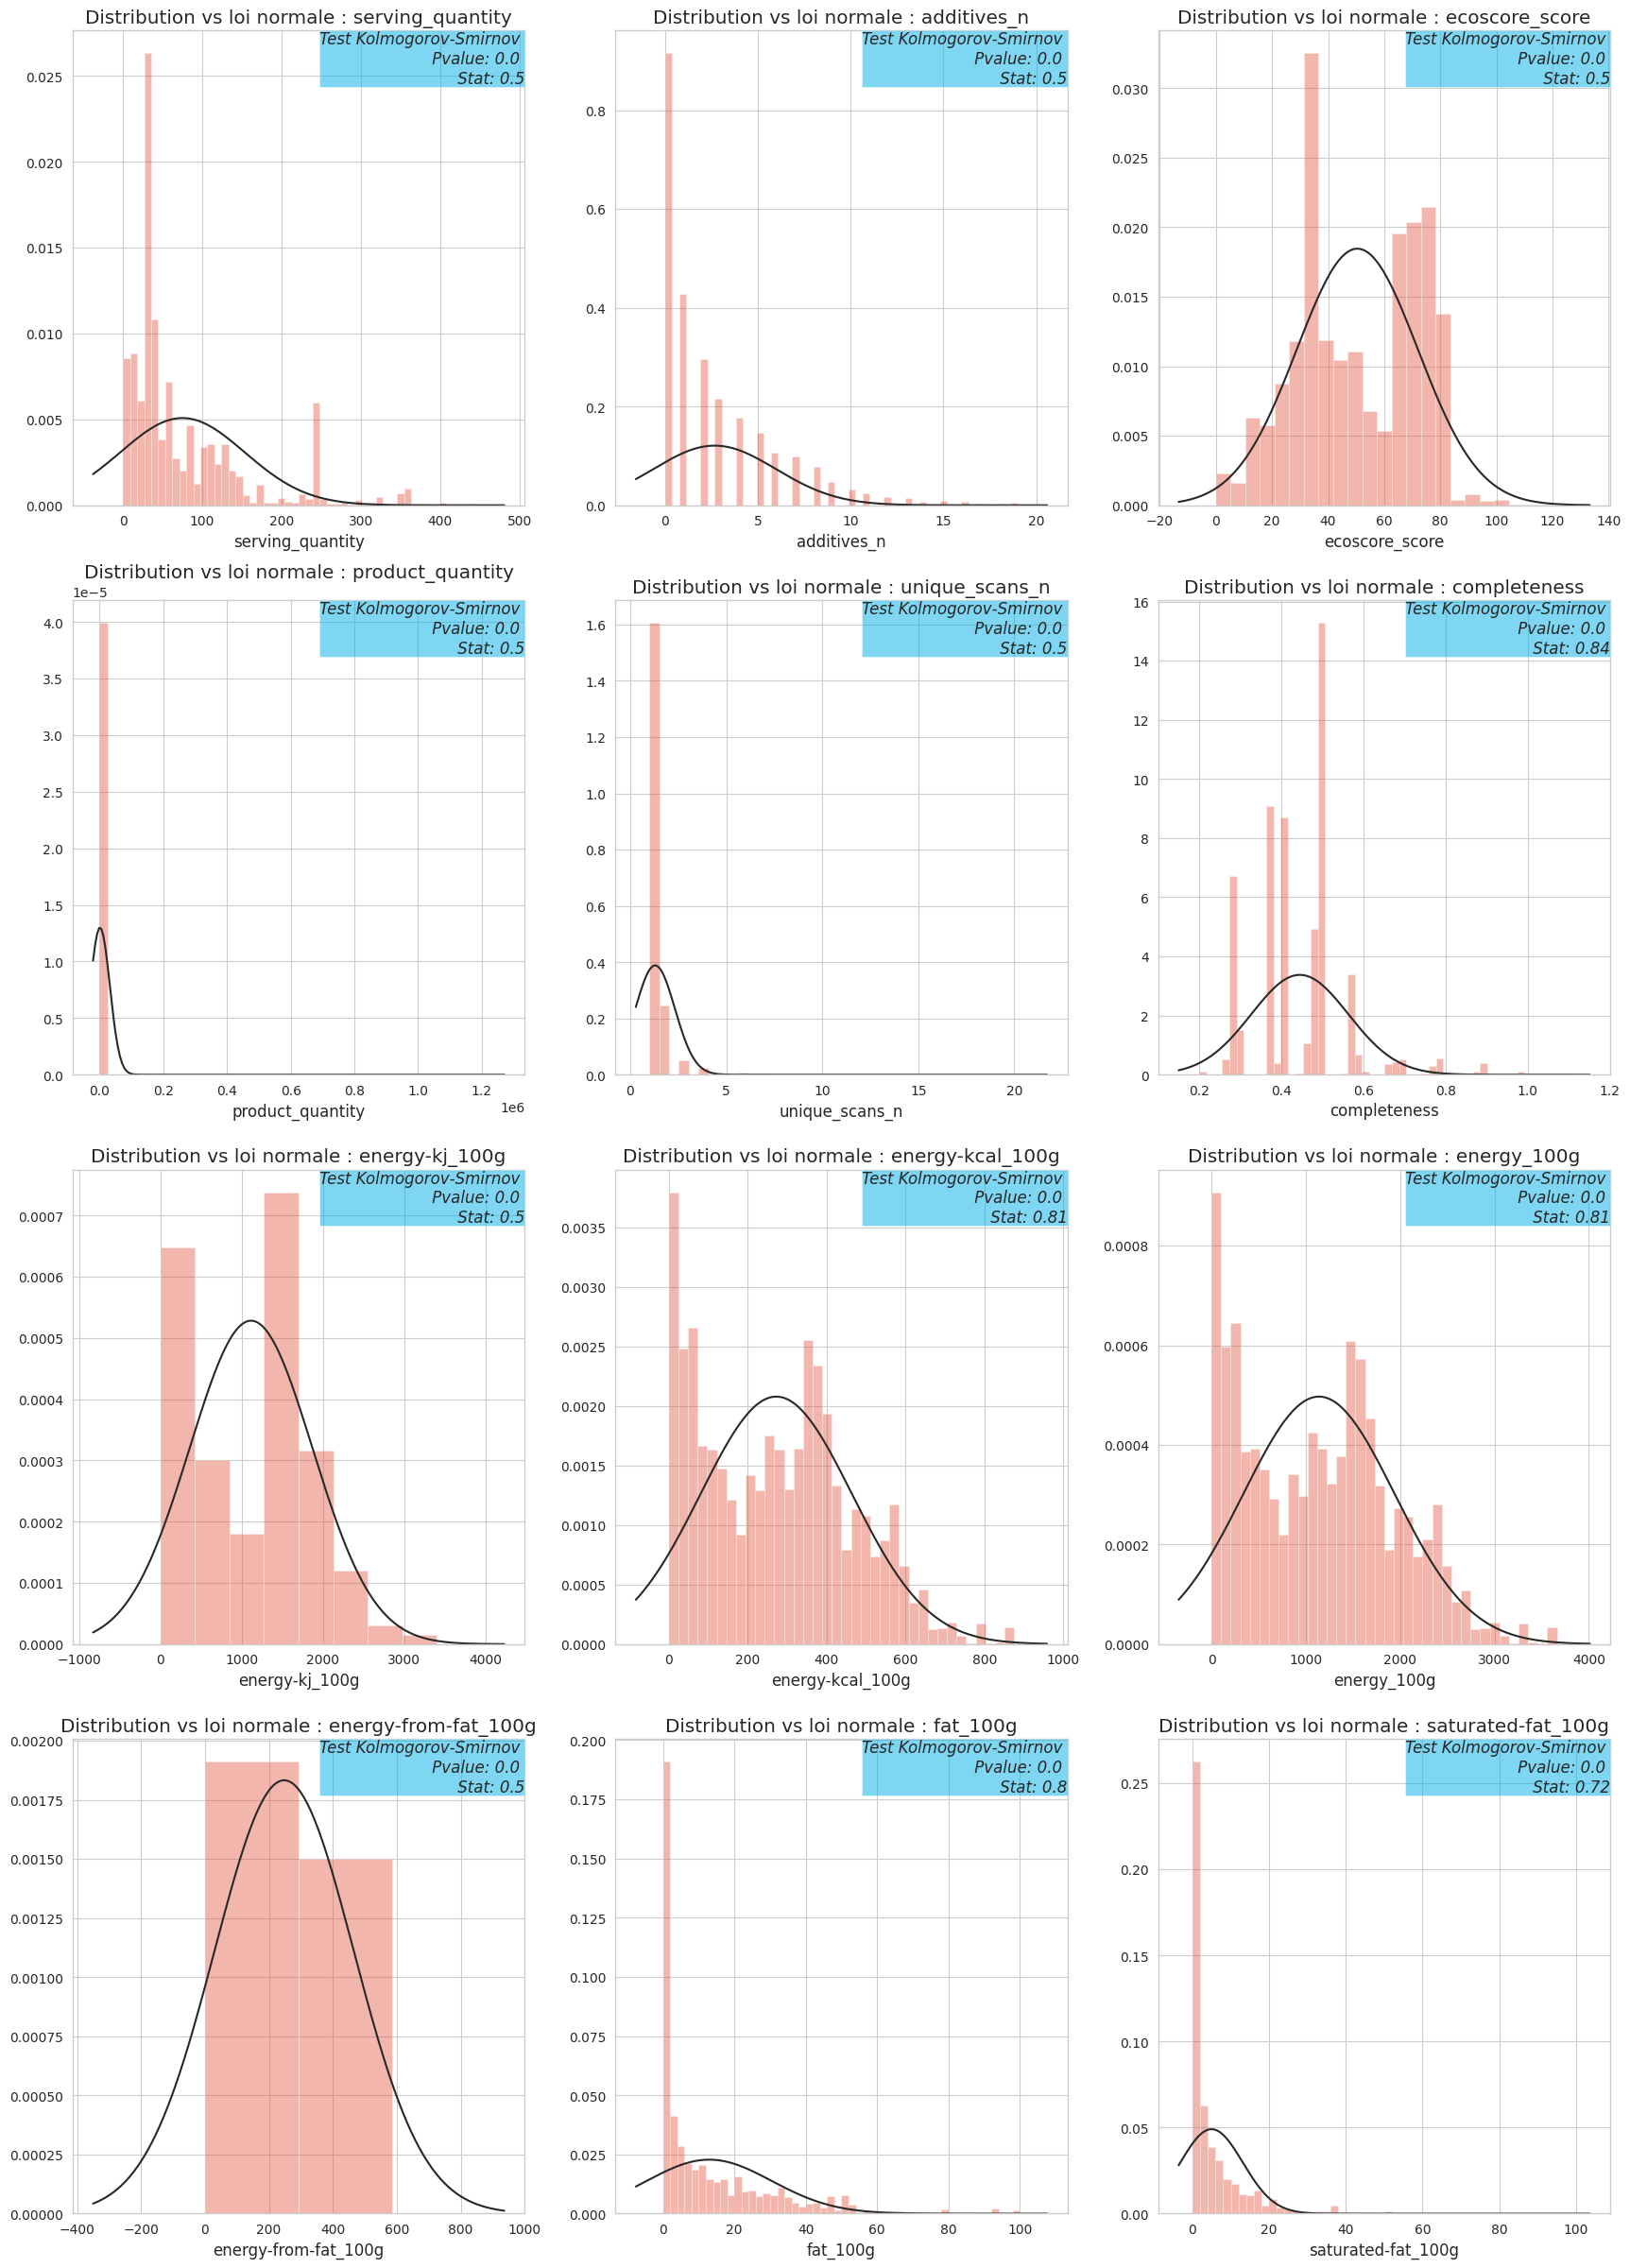

In [80]:
import scipy.stats as stats
import warnings

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
fig = plt.figure(figsize=(21, 30))

sub = 0
for i in range(len(numerical_features)):
    colonne = numerical_features[i]
    if datas_cleaned[colonne].nunique() > 1:
        # Tracé de la distribution
        fig.add_subplot(4, 3, sub+1)

        left, width = 0, 1
        bottom, height = 0, 1
        right = left + width
        top = bottom + height

        kstest = stats.kstest(datas_cleaned[colonne].notnull(), 'norm')
        ax = sns.distplot(datas_cleaned[colonne], fit=stats.norm, kde=False)
        ax.set_title("Distribution vs loi normale : {}".format(colonne))
        ax.text(right, top, 'Test Kolmogorov-Smirnov \n Pvalue: {:.2} \n Stat: {:.2}'.format(kstest.pvalue, kstest.statistic),
                horizontalalignment='right',
                verticalalignment='top',
                style='italic', transform=ax.transAxes, fontsize=12,
                bbox={'facecolor': '#00afe6', 'alpha': 0.5, 'pad': 0})
        sub += 1
    else:
        print("La colonne {} ne contient pas suffisamment de données pour être tracée.".format(colonne))

plt.show()


En se basant sur les projections obtenus et les résultats des tests de Kolmogorov-Smirnov (Pvalue < au niveau de test de 5%) **on rejette donc l'hypothèse de normalité des distributions de ces variables**. Il serait donc inexacte d'imputer les valeurs manquantes par la moyenne.

Pour confirmer cette approche, regardons à présent quelque unes de ces distributions en fonction de la catégorie `pnns_groups_1` :

ValueError: ignored

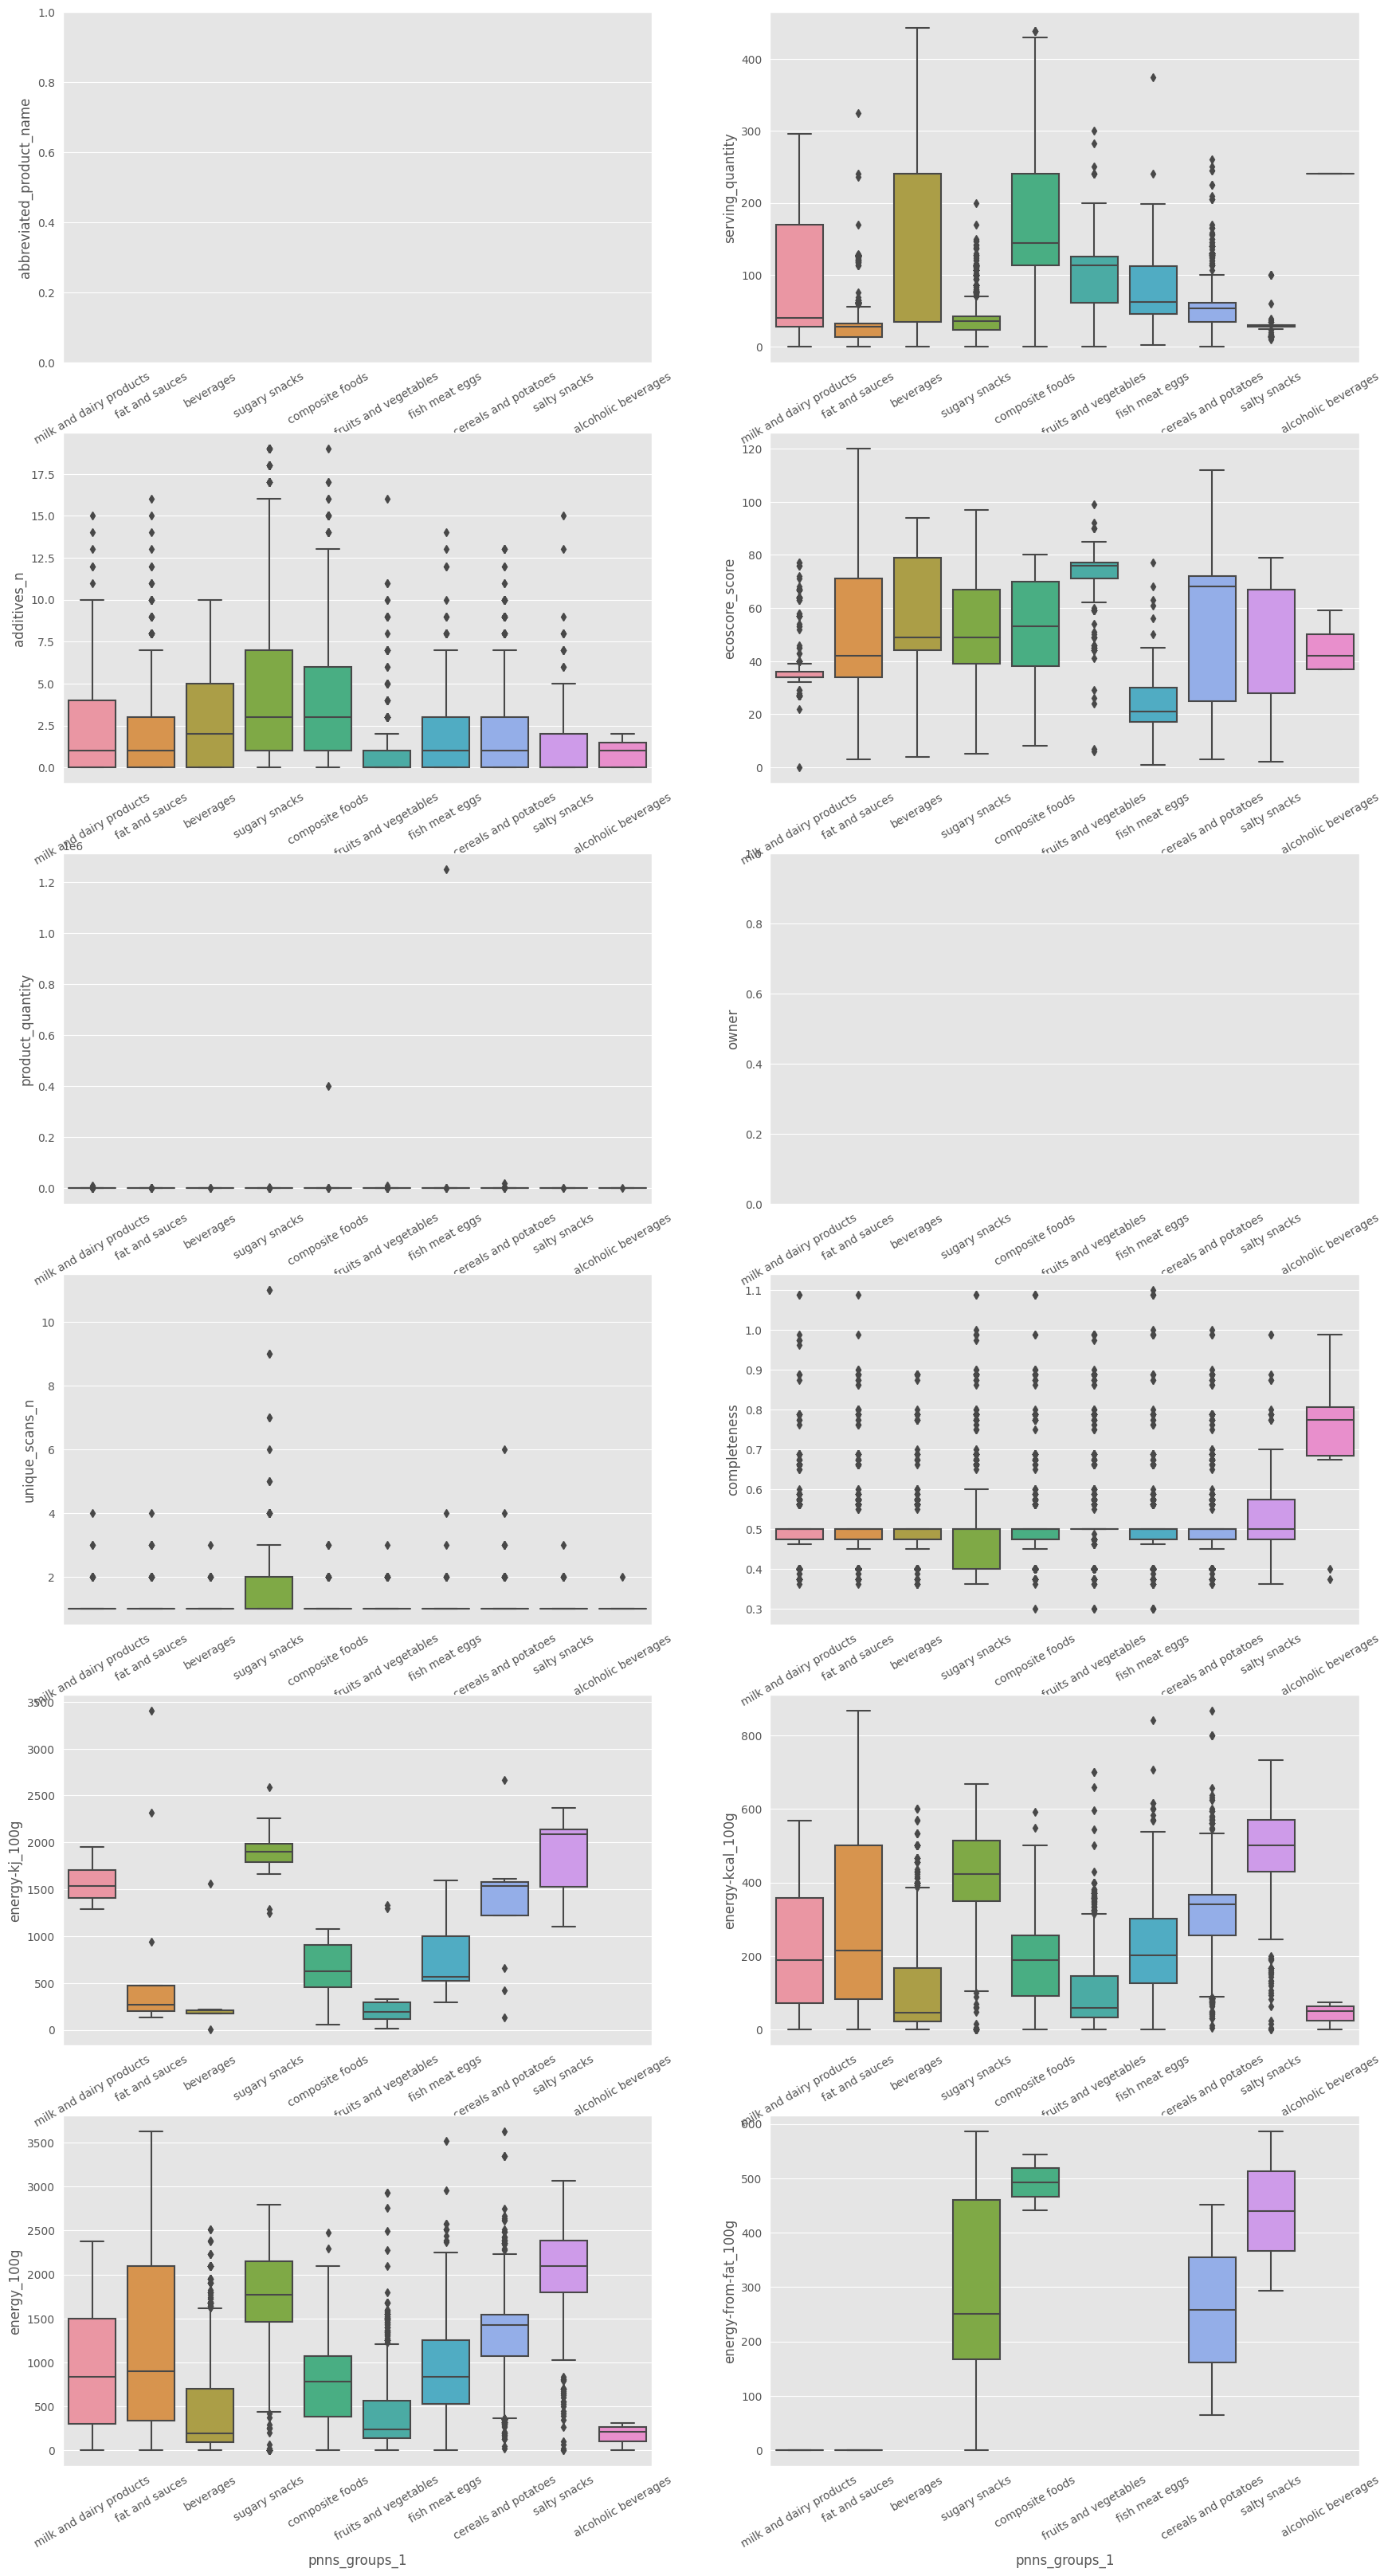

In [81]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(21,40))

sub = 0
for i in range(len(numerical_features)):
    fig.add_subplot(6,2,i+1)
    colonne = numerical_features[i]
    ax = sns.boxplot(x="pnns_groups_1", y=colonne, data=datas_cleaned[datas_cleaned["pnns_groups_1"]!="unknown"])
    for tick in ax.get_xticklabels():
        tick.set_rotation(30)
    sub += 1

fig.text(0.5, 0.90, r"Distribution des variables nutritionnelles" "\n" "par catégories pnns_groups_1", ha="center", 
         fontdict=font_title)
plt.show()

Si l'on regarde la distribution de quelques unes de ces mêmes variables sur la catégorie `pnns_groups_2` :

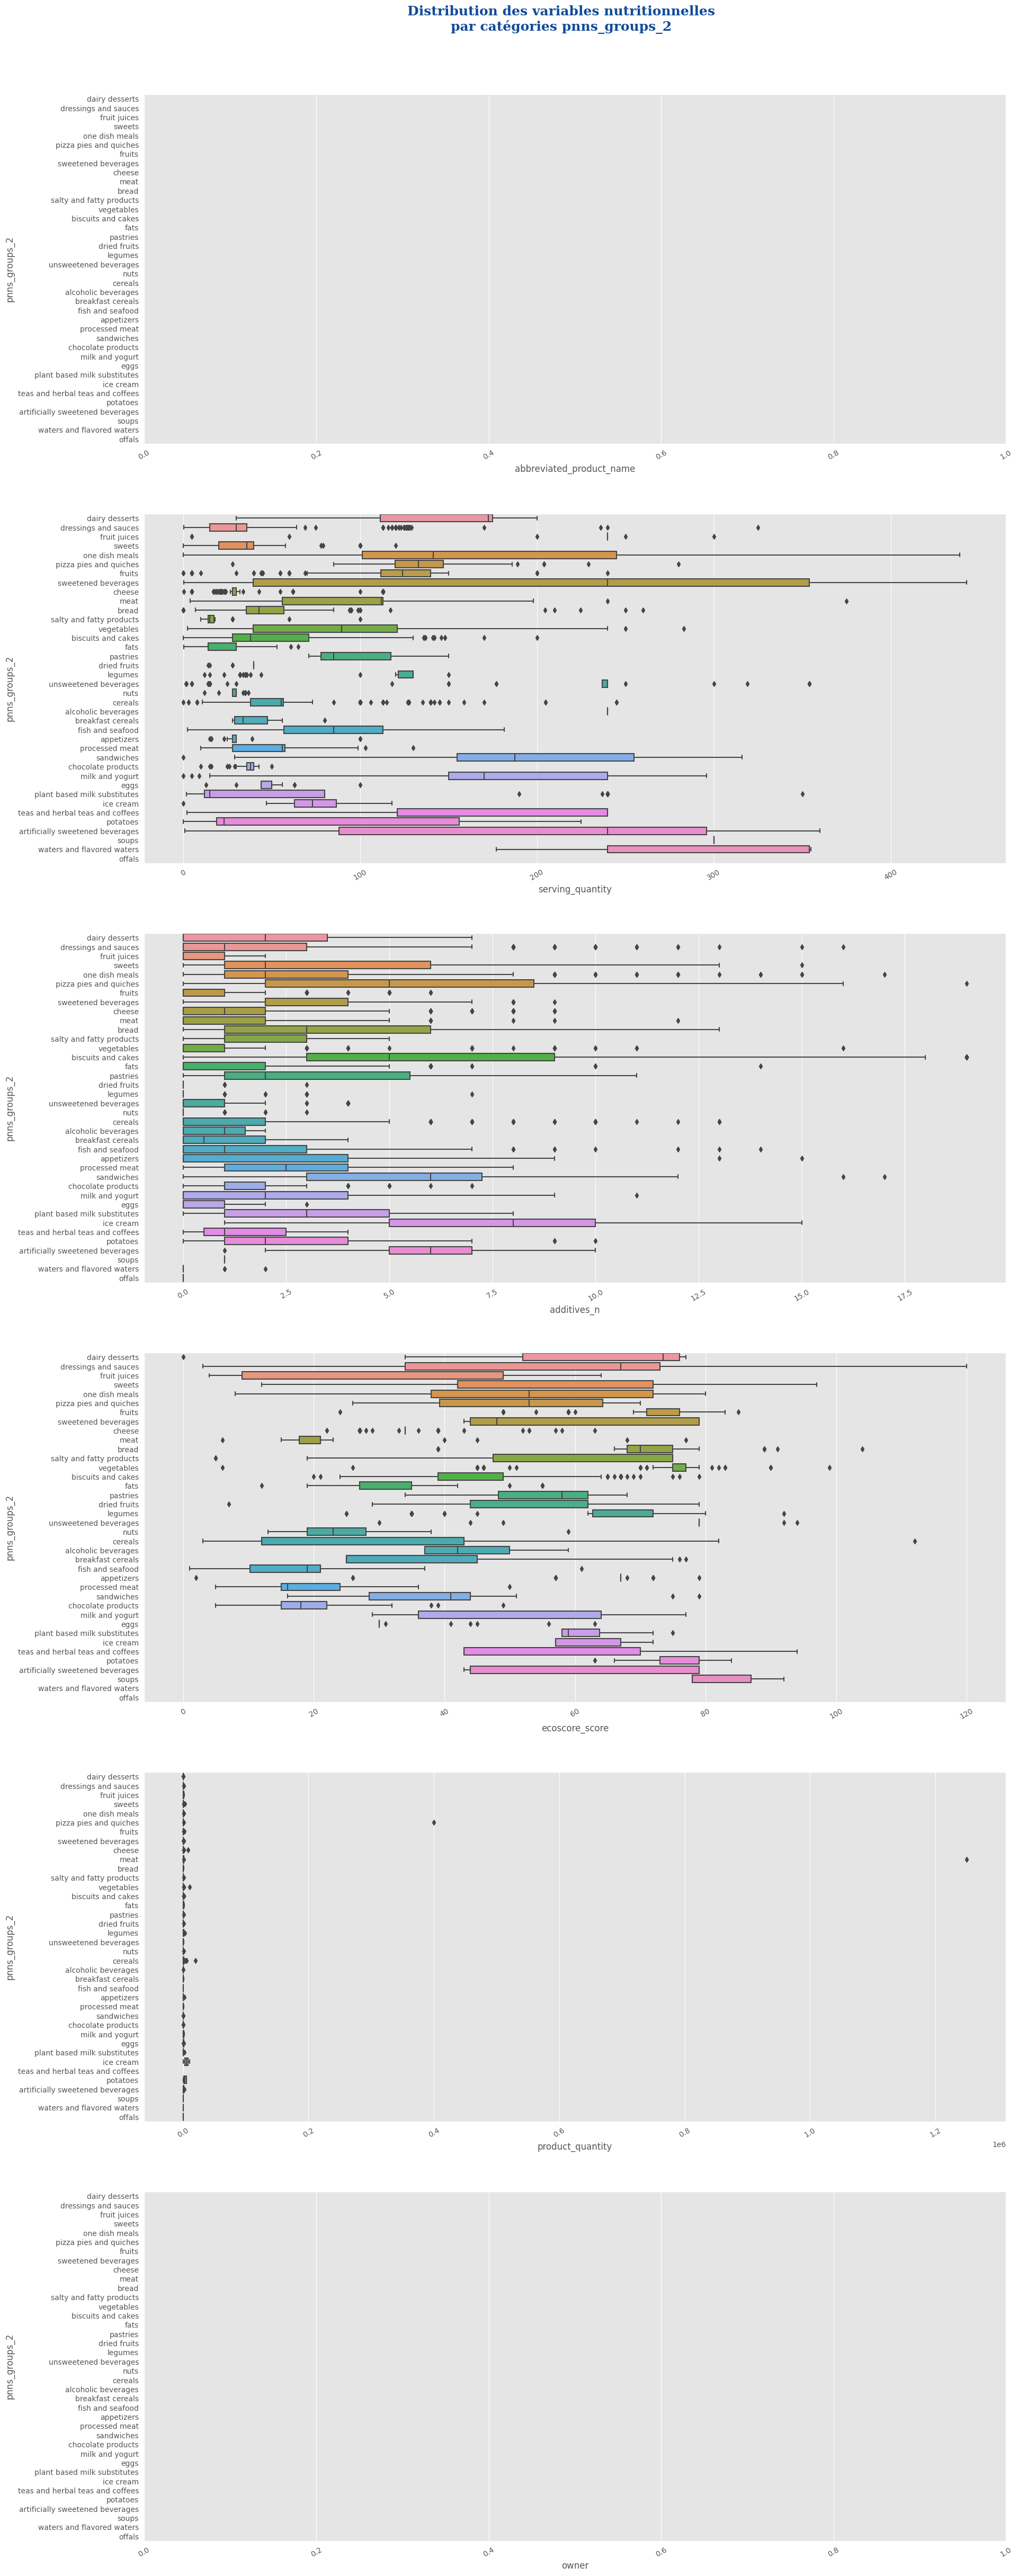

In [82]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(21,60))

sub = 0
for i in range(len(numerical_features[:6])):
    fig.add_subplot(6,1,i+1)
    colonne = numerical_features[i]
    ax = sns.boxplot(y="pnns_groups_2", x=colonne, data=datas_cleaned[datas_cleaned["pnns_groups_2"]!="unknown"])
    for tick in ax.get_xticklabels():
        tick.set_rotation(30)
    sub += 1

fig.text(0.5, 0.90, r"Distribution des variables nutritionnelles" "\n" "par catégories pnns_groups_2", ha="center", 
         fontdict=font_title)
plt.show()

In [83]:
datas_cleaned[numerical_features].isnull().sum()

abbreviated_product_name    16159
serving_quantity             6768
additives_n                  6487
ecoscore_score              13382
product_quantity            14319
                            ...  
choline_100g                16159
phylloquinone_100g          16105
beta-glucan_100g            16159
inositol_100g               16159
carnitine_100g              16159
Length: 123, dtype: int64

Pour ces valeurs nulles ci-dessus, les variables `serving_quantity` et `additives_n` sont très peu renseignées, nous allons donc les supprimer de notre jeu de données.     
`fiber_100g` est également mal renseigné mais nous en aurons besoin pour la suite. Nous allons donc compléter les valeurs nulles par la **médiane de la catégorie** `pnns_groups_2`.     
Enfin, pour les autres variables, avec peu de null et dont les distributions ne suivent pas la loi gaussiene, nous allons imputer avec l'**algorithme des K Nearest Neighbours** (KNN).

In [84]:
#On supprime les 2 colonnes les moins complétées et la variable redondante energie
datas_cleaned.drop(['serving_quantity','additives_n','energy-kcal_100g'], axis=1, inplace=True)

In [85]:
numerical_features.remove('serving_quantity')
numerical_features.remove('additives_n')
numerical_features.remove('energy-kcal_100g')

In [86]:
# KNN pour les autres variables
from sklearn.impute import KNNImputer

# On entraine le modèle d'imputation sur un échantillon de données
knn_features = ['energy_100g','proteins_100g','saturated-fat_100g','sugars_100g','salt_100g']
sample_datas = datas_cleaned[knn_features].sample(frac=0.25, random_state=1)
imputer = KNNImputer(n_neighbors=5, missing_values=np.nan)
imputer.fit(sample_datas)

KNNImputer()

In [87]:
# Puis on applique le modèle sur l'ensemble des données
datas_imputed = imputer.transform(datas_cleaned[knn_features])
df_datas_imputed = pd.DataFrame(datas_imputed, columns=knn_features)

In [88]:
for col_knn in knn_features:
    datas_cleaned[col_knn] = df_datas_imputed[col_knn].values

In [89]:
# On complète les variables restantes avec la médiane du groupe pnns 2
for col in ['carbohydrates_100g','sodium_100g','fat_100g','fiber_100g']:
    datas_cleaned[col] = datas_cleaned.groupby('pnns_groups_2')[col].transform(lambda x: x.fillna(x.median()))

Les valeurs manquantes étant à présent toutes complétées pour ces variables numériques, nous allons vérifier que les distributions n'ont pas changées :

ValueError: ignored

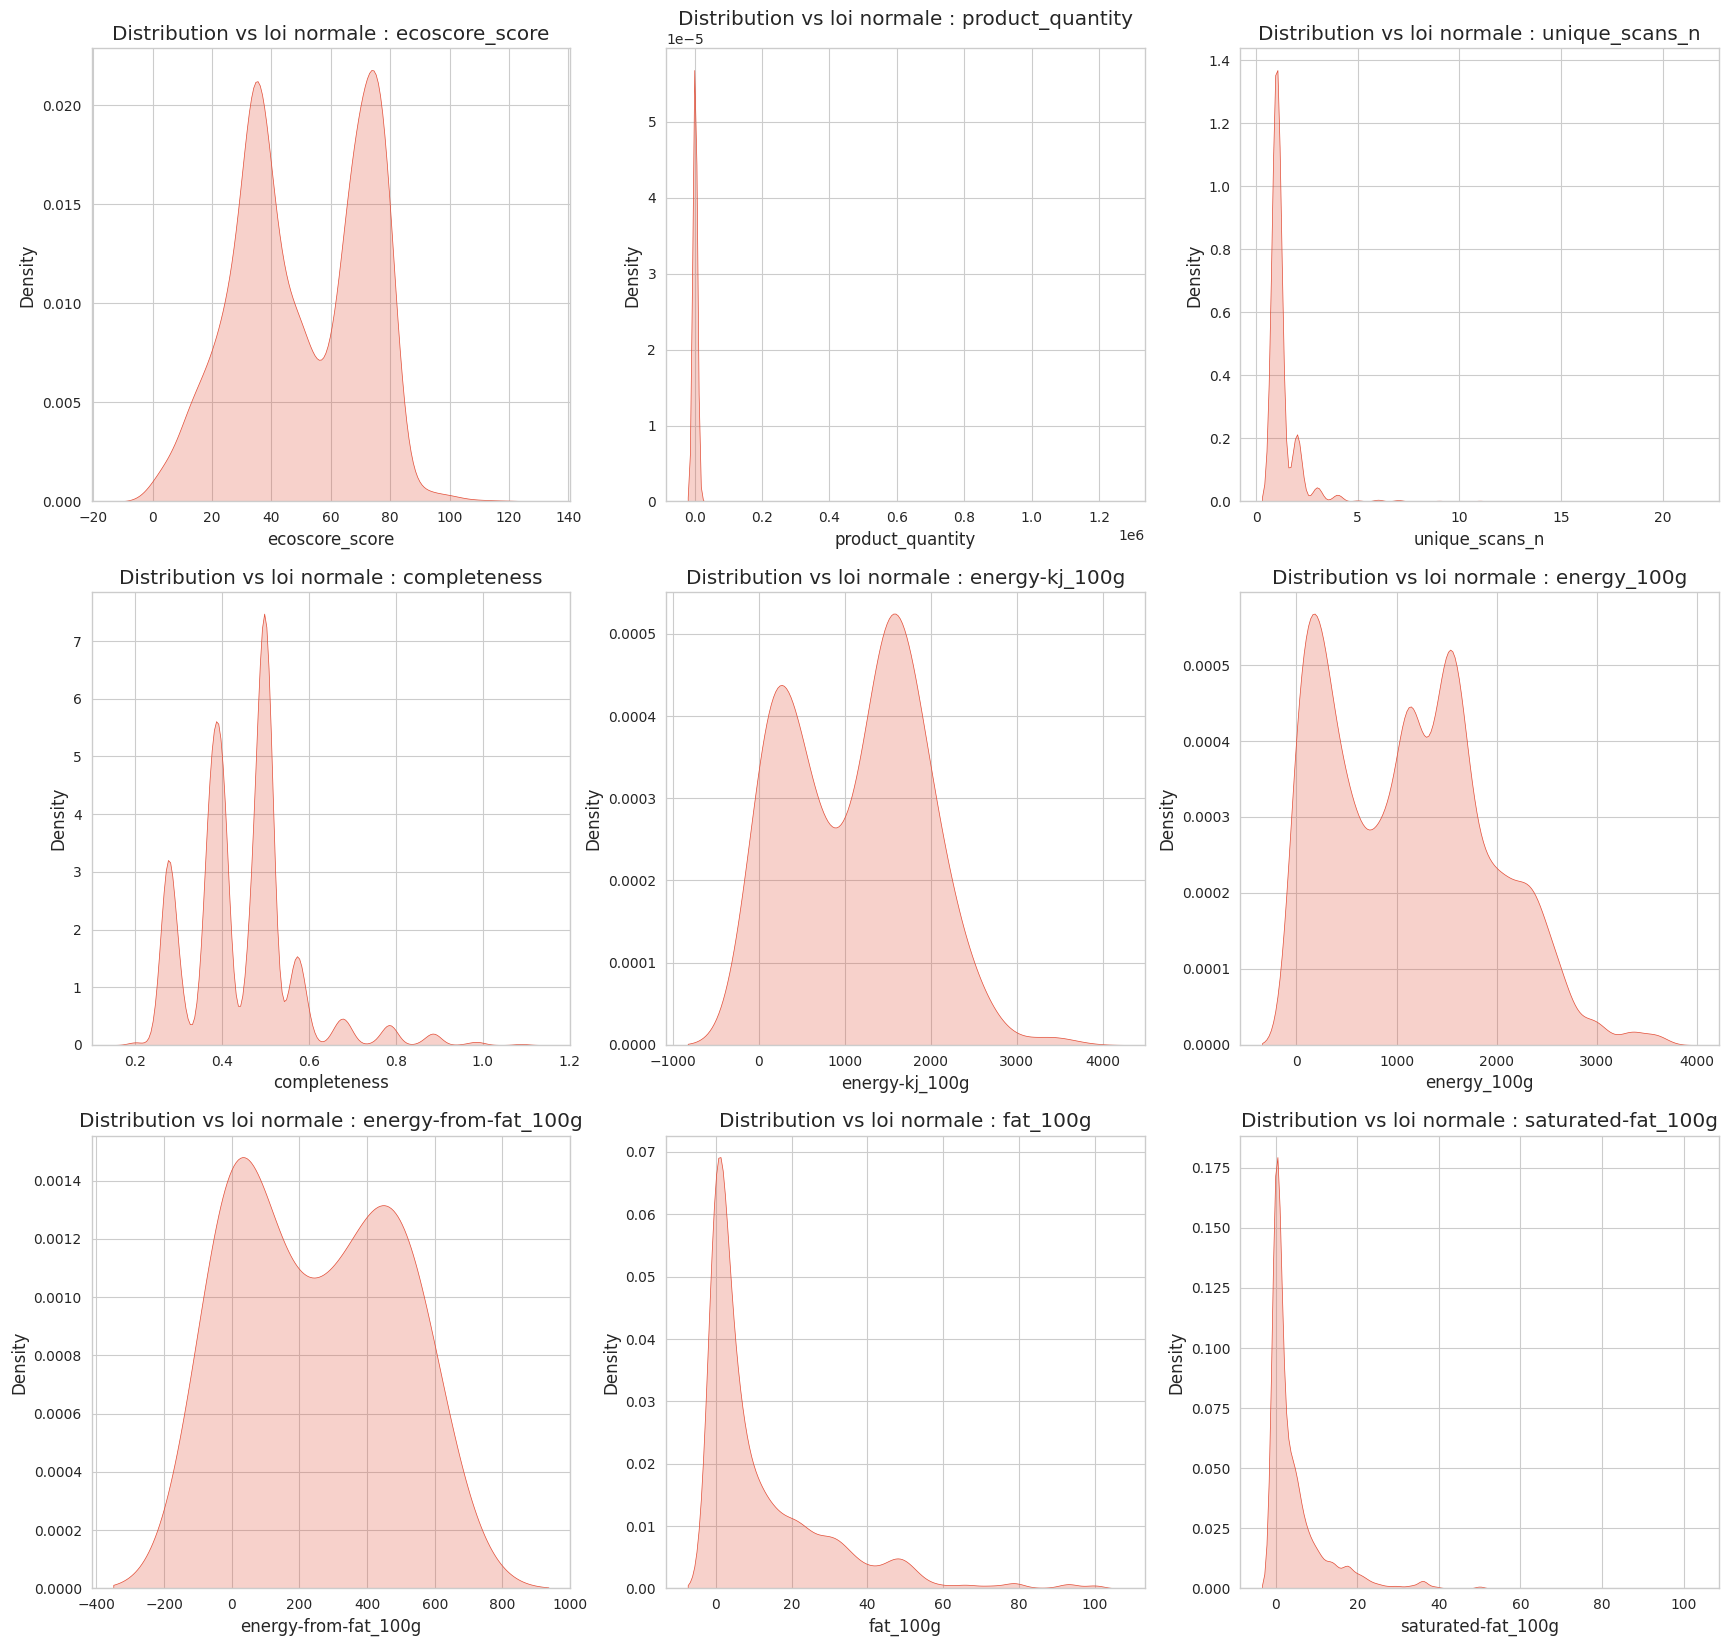

In [91]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(21,20))

sub = 0
for i in range(len(numerical_features)):
    colonne = numerical_features[i]
    if datas_cleaned[colonne].notnull().sum() > 1:  # Vérifie qu'il y a au moins 2 données non manquantes
        fig.add_subplot(3,3,sub+1)
        kstest = stats.kstest(datas_cleaned[colonne].notnull(),'norm')
        ax = sns.kdeplot(datas_cleaned[colonne].dropna(), shade=True)
        ax.set_title("Distribution vs loi normale : {}".format(colonne))
        sub += 1

plt.show()


Les variables imputées étant bien distribuées conformément aux variables d'origine, nous allons à présent **supprimer les dernières variables non pertinentes**, peu renseignées ou inutiles dans nos futurs modèles :

In [92]:
datas_cleaned.isnull().sum().sort_values(ascending=False)

gondoic-acid_100g     16159
butyric-acid_100g     16159
glucose_100g          16159
sucrose_100g          16159
nervonic-acid_100g    16159
                      ...  
url                       0
completeness              0
main_category_en          0
energy_100g               0
code                      0
Length: 162, dtype: int64

In [94]:
deleted_features = ['brands','serving_size','nova_group','image_ingredients_small_url','ingredients_text','image_nutrition_small_url','image_small_url', 'nutrition-score-fr_100g','quantity']
datas_cleaned.drop(deleted_features, axis=1, inplace=True)

### <font color="#ea1c60" id="section_6">1.6. Calcul des Nutri-Scores manquants</font>

Une des variables primoridale de ce jeu de données est le Nutriscore. Or, cette variable compte beaucoup de manquants. 
Afin de calculer ce nutriscore, nous avons besoin de plusieurs autres variables.

Le score prend en comptepour 100g de produit, la teneur :
- En nutriments et aliments à favoriser (fibres, protéines, fruits et légumes),
- En nutriments à limiter (énergie, acide gras saturés, sucres, sel).

Après calcul, le score obtenu par un produit permet de lui attribuer une lettre et une couleur.
Voici un tableau simplifié permettant de calculer l'attribution des points :

<table width="100%" style="border:solid 1px; text-align:center;" align="center">
    <thead style="border:solid 1px; text-align:center;">
        <th bgcolor="#feadb3"><b>Points</b></th>
        <th bgcolor="#feadb3">Energie (kJ)</th>
        <th bgcolor="#feadb3">Sucres simples (g)</th>
        <th bgcolor="#feadb3">Acide gras saturés (g)</th>
        <th bgcolor="#feadb3">Sodium (mg)</th>
        <th bgcolor="#b6faa3"><b>Points</b></th>
        <th bgcolor="#b6faa">Fruits,leg(%)</th>
        <th bgcolor="#b6faa">Fibres (g)</th>
        <th bgcolor="#b6faa">Protéines (g)</th>
    </thead>
    <tbody>
        <tr>
            <td bgcolor="#feadb3"><b>0</b></td>
            <td bgcolor="#feadb3">$\leq$ 335</td>
            <td bgcolor="#feadb3">$\leq$ 4,5</td>
            <td bgcolor="#feadb3">$\leq$ 1</td>
            <td bgcolor="#feadb3">$\leq$ 90</td>
            <td bgcolor="#b6faa"><b>0</b></td>
            <td bgcolor="#b6faa">$\leq$ 40</td>
            <td bgcolor="#b6faa">$\leq$ 0,7</td>
            <td bgcolor="#b6faa">$\leq$ 1,6</td>
        </tr>
        <tr>
            <td bgcolor="#feadb3"><b>5</b></td>
            <td bgcolor="#feadb3">$>$ 335</td>
            <td bgcolor="#feadb3">$>$ 4,5</td>
            <td bgcolor="#feadb3">$>$ 1</td>
            <td bgcolor="#feadb3">$>$ 90</td>
            <td bgcolor="#b6faa"><b>-2</b></td>
            <td bgcolor="#b6faa">$>$ 40</td>
            <td bgcolor="#b6faa">$>$ 0,7</td>
            <td bgcolor="#b6faa">$>$ 1,6</td>
        </tr>
        <tr>
            <td bgcolor="#feadb3"><b>10</b></td>
            <td bgcolor="#feadb3">$>$ 1675</td>
            <td bgcolor="#feadb3">$>$ 22,5</td>
            <td bgcolor="#feadb3">$>$ 5</td>
            <td bgcolor="#feadb3">$>$ 450</td>
            <td bgcolor="#b6faa"><b>-5</b></td>
            <td bgcolor="#b6faa">$>$ 80</td>
            <td bgcolor="#b6faa">$>$ 3,5</td>
            <td bgcolor="#b6faa">$>$ 8</td>
        </tr>
        <tr style="border:solid 1px; text-align:center;">
            <td> </td>
            <td>(a)</td>
            <td>(b)</td>
            <td>(c)</td>
            <td>(d)</td>
            <td> </td>
            <td>(e)</td>
            <td>(f)</td>
            <td>(g)</td>
        </tr>
        <tr>
            <td><b>Total</b></td>
            <td colspan="8"><b>(a) + (b) + (c) + (d) + (e) + (f) + (g)</b></td>
        </tr>
    </tbody>
</table>

Attribution des classes *(version simplifiée)* :

<table width="50%" style="border:solid 1px; text-align:center;" align="center">
    <thead>
        <th>Aliment solide</th>
        <th>Lettre</th>
        <th>Couleur</th>
    </thead>
    <tbody>
        <tr>
            <td>Mimimum -1</td>
            <td>A</td>
            <td>Vert foncé</td>
        </tr>
        <tr>
            <td>0 à 5</td>
            <td>B</td>
            <td>Vert</td>
        </tr>
        <tr>
            <td>5 à 10</td>
            <td>C</td>
            <td>Jaune</td>
        </tr>
        <tr>
            <td>10 à 20</td>
            <td>D</td>
            <td>Orange</td>
        </tr>
        <tr>
            <td>20 et plus</td>
            <td>E</td>
            <td>Orange foncé</td>
        </tr>
    </tbody>
</table>

Nous allons donc **isoler les variables nécessaires au calcul du Nutriscore et vérifier leur taux de remplissage** :

In [95]:
nutriscore_features = ['pnns_groups_1', 'pnns_groups_2', 'nutriscore_grade', 'nutriscore_score',
                       'energy_100g','sugars_100g','saturated-fat_100g','sodium_100g', 'fiber_100g', 'proteins_100g']
datas_cleaned[nutriscore_features].sample(10)

pnns_groups_1                 pnns_groups_2 nutriscore_grade  \
5365                unknown                       unknown              NaN   
14301               unknown                       unknown              NaN   
13307        fat and sauces          dressings and sauces                d   
14505               unknown                       unknown              NaN   
10613  cereals and potatoes             breakfast cereals                c   
16013               unknown                       unknown              NaN   
2317                unknown                       unknown              NaN   
6113         fish meat eggs                processed meat                d   
17318             beverages  plant based milk substitutes                a   
16634        fish meat eggs                processed meat                e   

       nutriscore_score  energy_100g  sugars_100g  saturated-fat_100g  \
5365                NaN       1893.0     7.142900           19.047600   
14301               NaN        142.4     0.000000            0.000000   
13307              13.0       1163.0     0.000000            0.000000   
14505               NaN        345.0     1.180000            0.000000   
10613               3.0       1360.0     7.500000            0.000000   
16013               NaN          0.0     0.000000            0.000000   
2317                NaN       1521.0     6.818182           10.227273   
6113               16.0        820.0     0.000000            5.360000   
17318              -1.0        176.0     2.500000            0.210000   
16634              23.0       1343.0     7.140000            8.930000   

       sodium_100g  fiber_100g  proteins_100g  
5365      0.261905    1.800000      16.666700  
14301     0.276074    1.800000       8.076000  
13307     6.667000    0.000000       0.000000  
14505     0.276074    1.800000       1.180000  
10613     0.312500    6.612022      12.500000  
16013     0.846154    1.800000       0.000000  
2317      0.545455    1.800000      34.090909  
6113      0.893000    0.000000      10.710000  
17318     0.050000    0.400000       2.920000  
16634     1.179000    0.000000      10.710000

La variable indiquant la proportion de fruit/légumes des produits a été supprimée car très peu renseignée. Nous allons donc tenter de l'estimer en fonction de la catégorie :

In [96]:
datas_cleaned.pnns_groups_2.unique()

array(['unknown', 'dairy desserts', 'dressings and sauces',
       'fruit juices', 'sweets', 'one dish meals',
       'pizza pies and quiches', 'fruits', 'sweetened beverages',
       'cheese', 'meat', 'bread', 'salty and fatty products',
       'vegetables', 'biscuits and cakes', 'fats', 'pastries',
       'dried fruits', 'legumes', 'unsweetened beverages', 'nuts',
       'cereals', 'alcoholic beverages', 'breakfast cereals',
       'fish and seafood', 'appetizers', 'processed meat', 'sandwiches',
       'chocolate products', 'milk and yogurt', 'eggs',
       'plant based milk substitutes', 'ice cream',
       'teas and herbal teas and coffees', 'potatoes',
       'artificially sweetened beverages', 'soups',
       'waters and flavored waters', 'offals'], dtype=object)

In [97]:
high_rate_fruit = ['fruit juices','dried fruits','legumes','vegetables','fruits', 'soups','potatoes','fruit nectars']

medium_rate_fruit = ['unknown', 'sweetened beverages', 'dressings and sauces', 'ice cream', 'pastries', 'dairy desserts',
                     'pizza pies and quiche', 'pizza pies and quiches']

low_rate_fruit = ['waters and flavored waters','chocolate products', 'fish and seafood', 'salty and fatty products', 
                  'cheese', 'cereals', 'appetizers', 'one dish meals', 'bread', 'fats', 'plant based milk substitutes',
                  'alcoholic beverages', 'processed meat', 'breakfast cereals', 'meat', 'eggs', 'sandwiches',
                  'offals', 'teas and herbal teas and coffees', 'biscuits and cakes', 'sweets', 'milk and yogurt',
                  'artificially sweetened beverages', 'unsweetened beverages','nuts']

In [98]:
datas_cleaned['fruits-vegetables-rate_100g'] = [81 if cat in high_rate_fruit else 45 if cat in medium_rate_fruit else 25 for cat in datas_cleaned.pnns_groups_2]

A présent, nous allons définir la **fonction de calcul du Nutriscore** et l'appliquer à notre dataset :

In [99]:
def calc_globalscore(row):
    #Energy
    if row["energy_100g"] <= 335:
        a = 0
    elif ((row["energy_100g"] > 335) & (row["energy_100g"] <= 1675)):
        a = 5
    else:
        a = 10 
    #Sugar
    if row["sugars_100g"] <= 4.5:
        b = 0
    elif ((row["sugars_100g"] > 4.5) & (row["sugars_100g"] <= 22.5)):
        b = 5
    else:
        b = 10
    #saturated-fat
    if row["saturated-fat_100g"] <= 1:
        c = 0
    elif ((row["saturated-fat_100g"] > 1) & (row["saturated-fat_100g"] <= 5)):
        c = 5
    else:
        c = 10
    #sodium
    if (row["sodium_100g"]/1000) <= 90:
        d = 0
    elif (((row["sodium_100g"]/1000) > 90) & ((row["sodium_100g"]/1000) <= 450)):
        d = 5
    else:
        d = 10
    #fruits-vegetables-rate
    if row["fruits-vegetables-rate_100g"] <= 40:
        e = 0
    elif ((row["fruits-vegetables-rate_100g"] > 40) & (row["fruits-vegetables-rate_100g"] <= 80)):
        e = -2
    else:
        e = -5
    #fiber
    if row["fiber_100g"] <= 0.7:
        f = 0
    elif ((row["fiber_100g"] > 0.7) & (row["fiber_100g"] <= 3.5)):
        f = -2
    else:
        f = -5
    #proteins
    if row["proteins_100g"] <= 1.6:
        g = 0
    elif ((row["proteins_100g"] > 1.6) & (row["proteins_100g"] <= 8)):
        g = -2
    else:
        g = -5
    
    #Global_score
    global_score = a+b+c+d+e+f+g
    
    return global_score

In [100]:
#Nutriscore
def calc_nutriscore(row):
    if row["calc_global_score"] < 0 :
        nutriscore = "a"
    elif ((row["calc_global_score"] >= 0) & (row["calc_global_score"] < 5)) :
        nutriscore = "b"
    elif ((row["calc_global_score"] >= 5) & (row["calc_global_score"] < 10)) :
        nutriscore = "c"
    elif ((row["calc_global_score"] >= 10) & (row["calc_global_score"] < 20)) :
        nutriscore = "d"
    else:
        nutriscore = "e"
        
    return nutriscore

In [101]:
datas_cleaned['calc_global_score'] = datas_cleaned.apply(lambda row: calc_globalscore(row),axis=1)
datas_cleaned['calc_nutriscore'] = datas_cleaned.apply(lambda row: calc_nutriscore(row),axis=1)

In [102]:
nutriscore_features.append('calc_global_score')
nutriscore_features.append('calc_nutriscore')

In [103]:
datas_cleaned[nutriscore_features].sample(10)

pnns_groups_1         pnns_groups_2 nutriscore_grade  \
10355                  unknown               unknown              NaN   
2624                   unknown               unknown              NaN   
14490                  unknown               unknown              NaN   
19223                  unknown               unknown                d   
18605                  unknown               unknown                c   
15031           fat and sauces  dressings and sauces              NaN   
8913            fat and sauces  dressings and sauces                e   
12355  milk and dairy products       milk and yogurt                d   
6986                   unknown               unknown              NaN   
6497             sugary snacks                sweets                e   

       nutriscore_score  energy_100g  sugars_100g  saturated-fat_100g  \
10355               NaN       1116.0     6.666667            0.000000   
2624                NaN       2469.0     5.000000            4.000000   
14490               NaN       2536.0     6.060606            7.575758   
19223              14.0       1866.0    10.710000           16.070000   
18605               3.0        699.0    16.670000            3.330000   
15031               NaN        523.0    19.100000            0.000000   
8913               23.0       1812.0     6.670000            8.330000   
12355              14.0       1393.0     0.000000           23.330000   
6986                NaN        896.0     0.000000            0.000000   
6497               25.0       2674.0    38.890000           36.110000   

       sodium_100g  fiber_100g  proteins_100g  calc_global_score  \
10355     0.444444    4.444444       8.888889                 -2   
2624      0.276074    1.800000      20.000000                 11   
14490     0.363636    1.800000      15.151515                 16   
19223     0.232000    7.100000      10.710000                 13   
18605     0.217000    3.300000       6.670000                  9   
15031     0.068000    0.500000       0.690000                  8   
8913      0.900000    0.000000       3.330000                 21   
12355     0.033000    0.000000       0.000000                 15   
6986      0.446000    3.570000       7.140000                 -4   
6497      0.069000    0.000000       5.560000                 28   

      calc_nutriscore  
10355               a  
2624                d  
14490               d  
19223               d  
18605               c  
15031               c  
8913                e  
12355               d  
6986                a  
6497                e

Nous devons à présent **vérifier les erreurs d'imputation sur les scores déjà connus**, ce qui nous permettra de voir si les calculs sont satisfaisants et utilisables :

In [104]:
df_scores = datas_cleaned[['nutriscore_grade', 'nutriscore_score', 'calc_nutriscore', 'calc_global_score']][datas_cleaned['nutriscore_grade'].isnull()==False]

from sklearn.metrics import accuracy_score

accuracy_nutrigrade = accuracy_score(df_scores['nutriscore_grade'].values, df_scores['calc_nutriscore'].values)
print("L'accuracy_score sur les Nutrigrades calculés est de : {:.2f} %.".format(accuracy_nutrigrade*100))

L'accuracy_score sur les Nutrigrades calculés est de : 50.20 %.


La précision du calul est donc inférieure à 50%. **Ces calculs ne peuvent donc pas être utilisés pour compléter nos données**.     **<font color="green">Notre application aura donc pour but d'éstimer le nutrigrade d'un produit en fonction de ses caractéristiques connues, comme la catégorie, sa teneur en nutriments ... grâce à des algorithmes simples de Machine Learning</font>**. 

In [105]:
datas_cleaned.drop(['calc_nutriscore','calc_global_score'], axis=1, inplace=True)

In [106]:
datas_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16159 entries, 1 to 19999
Columns: 154 entries, code to fruits-vegetables-rate_100g
dtypes: float64(121), int64(1), object(32)
memory usage: 19.1+ MB


Les variables sont à présent filtrées et les données nettoyées et complétées. Nous allons sauvegarder le dataset cleaned pour l'utiliser à présent dans nos **analyses exploratoires**.

In [107]:
datas_cleaned.set_index("code").to_csv("cleaned_openfoodfacts.csv", sep='\t')